# A cuál videojuego le apostamos?

Como analista de la tienda "Ice" procedere a analizar el nivel de éxito de nuestros productos.

# Contents 

* [Introducción](#introducción)
* [1. Inicialización](#inicializacion)
    * [1.1 Explorar datos iniciales](#Explorar)
    * [1.2 Revisión de la columna "year_of_release"](#Revisión-ausentes-y)
    * [1.3 Revisión de la columna "rating"](#Revisión-ausentes-r)
    * [1.4 Revisión de la columna "critic_score"](#Revisión-ausentes-c)
    * [1.5 Revisión de la columna "user_score"](#Revisión-ausentes-u)
    * [1.6 Cálculos generales](#Cálculo)
    * [1.7 Revisión de duplicados](#Revisión-duplicados)
* [2. Análisis de datos](#Análisis)
    * [2.1 Juegos lanzados por plataforma](#juegos)
    * [2.2 Ventas por plataformas y años](#ventas)
    * [2.3 Variación en ventas por platformas](#ventas-plat)
    * [2.4 Ventas totales y promedio por juegos](#ventas-tot)
    * [2.5 Ventas promedio](#ventas-prom)
    * [2.6 Relación entre reseña de usuario y ventas](#reseñas)
    * [2.7 Videojuegos en diferentes plataformas](#mas-vendido)
* [3. Análisis por región](#Análisis-región)
    * [3.1 Perfil región Norteamérica](#na)
    * [3.2 Perfil región Europa](#eu)
    * [3.3 Perfil región Japón](#jp)
    * [3.4 Perfil Otras Regiones](#otras)
    * [3.5 Comparativo entre regiones](#todas-regiones)
* [4. Prueba de Hipótesis](#Prueba-hipótesis)   
    * [4.1 Hipótesis 1: Calificaciones promedio para las plataformas Xone y PC](#hip1)
    * [4.2 Hipótesis 2: Calificaciones promedio para los géneros Action y Sports](#hip2)
* [5. Conclusiones](#Conclusiones)

<div id="introducción"/>

# Introducción

Este proyecto tiene como finalidad analizar la data reportada por la empresa ICE para identificar patrones que determinen si un juego tiene éxito o no. Esto le permitirá a la compañia detectar proyectos prometedores y planificar campañas publicitarias.

A continuación se realizará la carga de la información suministrada por la empresa que contiene registros de los videojuegos vendidos por categoría y zona de venta, así como su calificación y clasificación.

<div id="inicializacion"/>

## Inicialización 

Se procederá a la carga de las librerias y datos necesarios para el desarrollo del proyecto

<div id="Explorar"/>

### Explorar datos iniciales

In [1]:
#importación de librerias

import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode
import numpy as np
from scipy import stats as st
import math as mt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import levene

In [2]:
# Cargar los archivos de datos en DataFrame

data_game = pd.read_csv("/datasets/games.csv") 

Descripción de los datos:

— Name (Nombre)                                           
— Platform (Plataforma)      
— Year_of_Release (Año de lanzamiento)                    
— Genre (Género)                            
— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)                                 
— EU_sales (ventas en Europa en millones de dólares estadounidenses)                              
— JP_sales (ventas en Japón en millones de dólares estadounidenses)                               
— Other_sales (ventas en otros países en millones de dólares estadounidenses)                         
— Critic_Score (máximo de 100)                                 
— User_Score (máximo de 10)                                      
— Clasificación (ESRB)                                        

In [3]:
# Información general/resumida sobre el DataFrame
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Muestra de datos
data_game.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#checando valores ausentes
data_game.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Se tiene un Dataframe con 16715 datos, 11 columnas de las cuales:
- La columna "Year_of_Release" tiene 269 datos ausentes.
- La columna "Critic_Score" tiene 6701 datos ausentes.
- La columna "User_Score" tiene 6701 datos ausentes.
- La columna "Rating" tiene 6766 datos ausentes.
- La columna "Name" y "Genre" tienen ambos 2 datos ausentes.

Se observa que los nombres de las columnas están en mayúsculas, por lo que se procederá a cambiar a minúculas.

In [6]:
# renombra las columnas
data_game = data_game.rename(columns = str.lower)

In [7]:
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div id="Revisión-ausentes-y"/>

### Revisión de  la columna "year_of_release" 

In [8]:
#calculo de porcentaje de ausentes en la columna "Year_Of_Release"
def porcentaje_ausentes(data, columna):
    data_ausentes = data[columna].count()
    data_total_orig = data[columna].size
    porcentaje_ausentes = (data_total_orig - data_ausentes)/data_total_orig
    print(f"Porcentaje de datos ausentes en el campo {columna} en la data original:{porcentaje_ausentes:.0%}")

porcentaje_ausentes(data_game,"year_of_release")

Porcentaje de datos ausentes en el campo year_of_release en la data original:2%


In [9]:
data_game.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
#Revisión de la columna years_of_release
data_game["year_of_release"].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

Explorando la columna de year_of_release se observa que:
- fue en 1980 cuando se lanzan los primeros videojuegos, sin embargo, desde ese año y hasta 1994 se observa una sequía de juegos, es decir, no hubo mayor cantidad de lanzamientos (menor a 100).
- Es hasta el período 2001 - 2011 donde se observa el boom en los videojuegos. 
- Ya para el último período de 2012 - 2016 se observa nuevamente una merma en los lanzamientos de videojuegos.

Basándose en esta información se procederá a dividir en períodos o mejor dicho a agrupar los años de lanzamientos, así como también se examinarán los datos ausentes en esta columna.


In [11]:
data_game_filtered=data_game[data_game["year_of_release"].isna()]
data_game_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#Se hace un filtro para observar relación entre las columnas con ausentes
data_game.query('name=="LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


En esta columna se observa que el mismo videojuego, con el mismo género, se lanzó en diferentes plataformas en el mismo año, por lo que este puede ser una primera aproximación para reemplazar los valores ausentes. Se considerará la moda para la imputación.

In [13]:
data_game_year=data_game.pivot_table(index=["name", "genre"], values="year_of_release", aggfunc=mode)
data_game_year

,,year_of_release
name,genre,
Beyblade Burst,Role-Playing,2016.0
Fire Emblem Fates,Role-Playing,2015.0
Frozen: Olaf's Quest,Platform,2013.0
Haikyu!! Cross Team Match!,Adventure,2016.0
Tales of Xillia 2,Role-Playing,2012.0
...,...,...
thinkSMART FAMILY!,Misc,2010.0
thinkSMART: Chess for Kids,Misc,2011.0
uDraw Studio,Misc,2010.0


In [14]:
def reemplazo_year(lanzamiento):
    name = lanzamiento["name"]
    genre = lanzamiento["genre"]
    year_of_release = lanzamiento["year_of_release"]
    
    if pd.isna(year_of_release):
        try:
            return data_game_year["year_of_release"][name][genre]
        except:
            return "error"
    return year_of_release

In [15]:
lanzamiento_values=["Madden NFL 2004", "Sports", float("NaN")]
lanzamiento_columns=["name", "genre", "year_of_release"]
lanzamiento=pd.Series(data=lanzamiento_values, index=lanzamiento_columns)
reemplazo_year(lanzamiento)

2003.0

In [16]:
data_game.apply(reemplazo_year, axis=1).isna().sum()

0

In [17]:
data_game["year_of_release"] = data_game.apply(reemplazo_year, axis=1)

In [18]:
data_game[data_game["year_of_release"]=="error"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,error,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,error,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,error,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,error,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,error,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,error,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,error,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,error,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,error,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
data_game.query('name=="Rock Band"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,error,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,error,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,error,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,error,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [20]:
data_game[data_game["year_of_release"]=="error"]["name"].value_counts()

LEGO Harry Potter: Years 5-7         7
Rock Band                            4
Bejeweled 3                          3
WRC: FIA World Rally Championship    3
Test Drive Unlimited 2               3
                                    ..
Mega Man X Collection                1
Advance Wars: Days of Ruin           1
Super Puzzle Fighter II              1
wwe Smackdown vs. Raw 2006           1
Air-Sea Battle                       1
Name: name, Length: 158, dtype: int64

Se siguen observando valores ausentes en esta columna de año de lanzamiento, muy probablemente se deba a que hay un juego en específico que solo fue lanzado en ese año por una sola plataforma y no se tiene datos para otra que pueda correlacionarse, o un juego que fue lanzado en varias plataformas pero no se reporto en ninguna el año de lanzamiento, en este caso se consideraron los videojuegos con más "error" y se busco en que año se lanzaron para sustituirlo. Esto se podría hacer con los demás juegos, pero son 139 casos que quedan pendiente y sería demorado, por lo que ahora se procederá a agrupar la columna para buscar una relación con plataforma.

In [21]:
#sustitución de datos ausentes en la columna "year_of_release" con datos tomados en internet
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="LEGO Harry Potter: Years 5-7"), "year_of_release"]= 2011
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Rock Band"), "year_of_release"]= 2007
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="WRC: FIA World Rally Championship"), "year_of_release"]= 2010
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Bejeweled 3"), "year_of_release"]= 2010
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Test Drive Unlimited 2"), "year_of_release"]= 2011
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Virtua Quest"), "year_of_release"]= 2004
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Combat Elite: WWII Paratroopers"), "year_of_release"]= 2005
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="All-Star Baseball 2005"), "year_of_release"]= 2004
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Silent Hill: Homecoming"), "year_of_release"]= 2008

data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Robert Ludlum's The Bourne Conspiracy"), "year_of_release"]= 2008
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Port Royale 3"), "year_of_release"]= 2012
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Backbreaker"), "year_of_release"]= 2010
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="wwe Smackdown vs. Raw 2006"), "year_of_release"]= 2005
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Ferrari: The Race Experience"), "year_of_release"]= 2010
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Agarest Senki: Re-appearance"), "year_of_release"]= 2008

data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Football Manager 2007"), "year_of_release"]= 2006
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Hakuouki: Shinsengumi Kitan"), "year_of_release"]= 2010
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Combat"), "year_of_release"]= 1982
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Triple Play 99"), "year_of_release"]= 1998
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Homeworld Remastered Collection"), "year_of_release"]= 2015
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="TERA"), "year_of_release"]= 1982
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Clockwork Empires"), "year_of_release"]= 2016

data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Monster Hunter 2"), "year_of_release"]= 2006
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Mountain Bike Adrenaline"), "year_of_release"]= 2007
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Sega Rally 2006"), "year_of_release"]= 2005
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Samurai Spirits: Tenkaichi Kenkakuden"), "year_of_release"]= 2005
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Demon Chaos"), "year_of_release"]= 2005

data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Battle vs. Chess"), "year_of_release"]= 2011
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Singularity"), "year_of_release"]= 2010
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="The Lord of the Rings: War in the North"), "year_of_release"]= 2011
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="The Daring Game for Girls"), "year_of_release"]= 2010
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["name"]=="Flag Capture"), "year_of_release"]= 1980


In [22]:
data_game.query('name=="Rock Band"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,2007,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,2007,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,2007,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,2007,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [23]:
#Definir función para agrupar por años de lanzamiento
def year_group(year):
    try:
        if 1984 >=  year >=  1980:
            return "1980-1984"
        elif 1989 >=  year >=  1985:
            return "1985-1989"
        elif 1994 >=  year >= 1990:
            return  "1990-1994"
        elif 1999 >=  year >= 1995:
            return "1995-1999"
        elif 2004 >=  year >= 2000:
            return  "2000-2004"
        elif 2009 >=  year >= 2005:
            return  "2005-2009"
        elif 2016 >=  year >= 2010:
            return  "2010-2016"
    except:
        return "unknown"

In [24]:
data_game["year_group"]=data_game["year_of_release"].apply(year_group)


In [25]:
data_game["year_group"].value_counts()

2005-2009    6047
2010-2016    5336
2000-2004    3225
1995-1999    1490
1990-1994     283
unknown       126
1980-1984     125
1985-1989      83
Name: year_group, dtype: int64

Se buscara relacionar la columna agrupada con la columna "platform" 

In [26]:
data_game[data_game["year_of_release"]== "error"]["platform"].value_counts()

DS      21
Wii     19
PS2     17
2600    15
GBA      9
XB       8
X360     8
PSP      6
PS       6
3DS      5
GC       5
PS3      4
GB       1
N64      1
PSV      1
Name: platform, dtype: int64

In [27]:
data_game[(data_game["year_of_release"]!= "error")].groupby(["year_group", "platform"])["year_group"].value_counts()

year_group  platform  year_group
1980-1984   2600      1980-1984     105
            NES       1980-1984      19
            PC        1980-1984       1
1985-1989   2600      1985-1989      13
            DS        1985-1989       1
                                   ... 
2010-2016   PSV       2010-2016     429
            Wii       2010-2016     457
            WiiU      2010-2016     147
            X360      2010-2016     694
            XOne      2010-2016     247
Name: year_group, Length: 67, dtype: int64

In [28]:
#Sustitucion de ausentes en columna de agrupacion por año
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="DS"), "year_group"]= "2005-2009"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PS2"), "year_group"]= "2000-2004"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="Wii"), "year_group"]= "2010-2016"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="2600"), "year_group"]= "1980-1984"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="X360"), "year_group"]= "2005-2009"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PS3"), "year_group"]= "2005-2009"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="GBA"), "year_group"]= "2000-2004"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PS"), "year_group"]= "1995-1999"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="XB"), "year_group"]= "2000-2004"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PSP"), "year_group"]= "1995-1999"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="3DS"), "year_group"]= "2010-2016"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="GC"), "year_group"]= "2000-2004"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="N64"), "year_group"]= "1995-1999"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PSV"), "year_group"]= "2010-2016"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="GB"), "year_group"]= "1995-1999"


In [29]:
#imputación de ausentes en la columna "year_of_release" por valores de correlación con platform
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="DS"), "year_of_release"]= "2007"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PS2"), "year_of_release"]= "2002"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="Wii"), "year_of_release"]= "2010"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="2600"), "year_of_release"]= "1980"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="X360"), "year_of_release"]= "2007"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PS3"), "year_of_release"]= "2007"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="GBA"), "year_of_release"]= "2002"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PS"), "year_of_release"]= "1997"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="XB"), "year_of_release"]= "2002"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PSP"), "year_of_release"]= "1997"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="3DS"), "year_of_release"]= "2013"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="GC"), "year_of_release"]= "2002"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="N64"), "year_of_release"]= "1997"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="PSV"), "year_of_release"]= "2013"
data_game.loc[(data_game["year_of_release"]=="error")& (data_game["platform"]=="GB"), "year_of_release"]= "1997"

In [30]:
#comprobación en la columna "year_group"
data_game[data_game["year_group"]== "error"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group


In [31]:
#comprobación en la columna "years_of_release"
data_game[data_game["year_of_release"]== "error"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group


In [32]:
#conversión de datos
data_game["year_of_release"] = data_game["year_of_release"].astype(int)

In [33]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  year_group       16715 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


<div id="Revisión-ausentes-r"/>

### Revisión de la columna "rating" 
Ahora analizamos la columna "rating", la cual se refiere a la clasificación otorgada  por la junta de clasificación de software de entretenimiento, evaluando el contenido de los videojuegos.

In [34]:
porcentaje_ausentes(data_game,"rating")

Porcentaje de datos ausentes en el campo rating en la data original:40%


In [35]:
#Revisión de datos ausentes  en la columna "rating"
data_game[data_game["rating"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-1989
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1995-1999
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,1985-1989
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1980-1984
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,2005-2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010-2016
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2005-2009
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010-2016
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2000-2004


In [36]:
data_game["rating"].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [37]:
data_game[(data_game["rating"].isna()) & (data_game["critic_score"].isna())& (data_game["user_score"].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-1989
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1995-1999
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,1985-1989
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1980-1984
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,2005-2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010-2016
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2005-2009
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2010-2016
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2000-2004


Relacionando la columna de "rating" con las de "critic_score" y "user_score" se observa que el 98% de los datos ausentes de rating también tienen faltantes en las otras 2 columnas, muy probablemente se deba a que no estaba bien definido desde el auge de los videojuegos la clasificacion.
Esta columna puede imputarse con "RP" que sería rating pending.

In [38]:
#Imputación de ausentes en la columna "rating"
data_game["rating"].fillna("RP", inplace=True)
data_game.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
year_group            0
dtype: int64

<div id="Revisión-ausentes-c"/>

### Revisión de la columna "critic_score" 

Esta columna es la que más datos ausentes tiene, procederemos a la revisión de los mismos:

In [39]:
porcentaje_ausentes(data_game,"critic_score")

Porcentaje de datos ausentes en el campo critic_score en la data original:51%


In [40]:
data_game[(data_game["user_score"].isna()) & (data_game["critic_score"].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,1985-1989
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,1995-1999
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,1985-1989
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,1980-1984
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,RP,2005-2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,2010-2016
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,2005-2009
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,2010-2016
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,2000-2004


El 78% de la data con valores ausentes en la columna "critic_score" se corresponde con los valores ausentes en la columna "user_score", ambas, al igual que la columna "rating" se relacionan.

In [41]:
data_game["critic_score"].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [42]:
pd.crosstab(data_game[data_game["critic_score"].isna()]["year_group"], data_game[data_game["critic_score"].isna()]["platform"], margins= "all")

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,All
year_group,,,,,,,,,,,,,,,,,,,,,
1980-1984,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,139
1985-1989,13,0,0,0,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81
1990-1994,0,1,0,0,0,22,0,0,29,1,...,6,148,0,0,0,0,0,0,0,281
1995-1999,0,2,0,18,0,38,0,0,0,0,...,0,91,2,2,0,0,0,0,0,1408
2000-2004,0,0,1,18,12,27,258,72,0,0,...,0,0,0,4,0,0,0,73,0,969
2005-2009,0,0,0,2,987,0,126,36,0,0,...,0,0,0,0,394,0,93,26,0,2697
2010-2016,0,0,351,0,434,0,0,0,0,0,...,0,0,0,0,341,57,253,0,78,3003
All,133,3,352,38,1434,98,384,108,29,1,...,6,239,2,6,735,57,346,99,78,8578


In [43]:
pd.crosstab(data_game[data_game["critic_score"].isna()!=True]["year_group"], data_game[data_game["critic_score"].isna()!=True]["platform"], margins= "all")

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,All
year_group,,,,,,,,,,,,,,,,,,
1980-1984,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1985-1989,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2
1990-1994,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2
1995-1999,0,3,0,0,0,9,84,0,0,0,0,0,0,0,0,0,0,96
2000-2004,0,11,11,382,341,84,115,839,0,0,8,0,0,0,0,504,0,2295
2005-2009,0,0,628,56,107,255,0,458,336,0,397,0,450,0,475,221,0,3383
2010-2016,168,0,78,0,0,363,0,1,484,252,57,120,135,90,441,0,169,2358
All,168,14,717,438,448,715,200,1298,820,252,462,120,585,90,916,725,169,8137


Comparando la data con y sin datos ausentes:
- El 43% de la información faltante en "critic_score" corresponde a los juegos lanzados entre 2000 - 2009, y en ese mismo período se tiene la mayor cantidad de juegos lanzados con calificación oficial (70%).
- El 35% de la información con datos ausentes se presenta después del año 2010 y la cantidad de información en este periodo con datos en el campo "critic_score" es de un 29%.
- El 22% de los datos faltantes se ubican en la década de los 80 y 90 y como era de esperarse solo el 1% de la información en este grupo de años está completa con reseña de calificación.

In [44]:
def funcion(df, columna, columna_1):
    p1 = df[df[columna].isna()][columna_1].value_counts(normalize=True) 
    p2 = df[df[columna].isna()!=True][columna_1].value_counts(normalize=True)
    d = pd.concat([p1, p2], axis=1)
    d.columns = ['datos ausentes', 'sin datos ausentes']
    return d
funcion(data_game, "critic_score", "genre")

,datos ausentes,sin datos ausentes
Action,0.172458,0.232272
Misc,0.143074,0.064274
Sports,0.134562,0.146737
Adventure,0.114272,0.039695
Role-Playing,0.088736,0.090574
Simulation,0.060751,0.043259
Racing,0.059118,0.091188
Fighting,0.051306,0.050264
Platform,0.045592,0.061079
Strategy,0.044426,0.037114


In [45]:
funcion(data_game, "critic_score", "platform")

,datos ausentes,sin datos ausentes
DS,0.167172,0.088116
PS,0.116228,0.024579
PS2,0.100606,0.159518
PSP,0.087083,0.056778
Wii,0.085684,0.071894
PS3,0.059571,0.100774
GBA,0.044766,0.053828
3DS,0.041035,0.020646
X360,0.040336,0.112572
N64,0.037188,NaN


In [46]:
funcion(data_game, "critic_score", "rating")

,datos ausentes,sin datos ausentes
RP,0.779086,0.010569
E,0.137794,0.345090
T,0.037421,0.324444
E10+,0.035206,0.137397
M,0.009326,0.182254
EC,0.000933,NaN
K-A,0.000233,0.000123
AO,NaN,0.000123


In [47]:
funcion(data_game, "critic_score", "year_group")

,datos ausentes,sin datos ausentes
2010-2016,0.350082,0.289787
2005-2009,0.314409,0.415755
1995-1999,0.164141,0.011798
2000-2004,0.112963,0.282045
1990-1994,0.032758,0.000246
1980-1984,0.016204,0.000123
1985-1989,0.009443,0.000246


Analizando esta columna se encontró lo siguiente:
- Las plataformas en las que se presentan la mayor cantidad de ausentes son: DS, PS y PS2 y las plataformas con más datos de calificación son PS2, PS3 y X360.
- Los géneros con mayor cantidad de datos faltantes son: "Action", "Misc" y "Sports", mientras que las que más evaluadas fueron: "Action", "Sports" y "Shooter".
- El 78% de los datos ausentes se encuentran en la categoria sin rating, mientrás que en las evaluadas el grueso se concentra en para todo público, adolescentes y adultos.
- El período del 2000 al 2016 reporta el mayor número de calificaciones del juego.

En conclusión, no hay como una variable específica que permita relacionar esta columna, por lo que se dejarán estos datos ausentes tal como están.

<div id="Revisión-ausentes-u"/>

### Revisión de la columna "user_score" 

In [48]:
porcentaje_ausentes(data_game,"user_score")

Porcentaje de datos ausentes en el campo user_score en la data original:40%


In [49]:
data_game["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

En esta columna se observa que aparte de los valores ausentes hay un campo que corresponde a tbd (a determinar), es decir, los usuarios no hicieron una calificación para esos juegos.

In [50]:
data_game.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,2010-2016
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,2005-2009
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2010-2016
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2010-2016
657,Frogger's Adventures: Temple of the Frog,GBA,2002,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2000-2004
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,2000-2004
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,2000-2004
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,2005-2009
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,2005-2009


In [51]:
pd.crosstab(data_game[data_game["user_score"]== "tbd"]["year_group"], data_game[data_game["user_score"]== "tbd"]["platform"], margins="all")

platform,3DS,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,All
year_group,,,,,,,,,,,,,,,,,
1995-1999,0,0,0,0,1,9,0,0,0,0,0,0,0,0,0,0,10
2000-2004,0,1,214,74,1,36,98,0,0,1,0,0,0,0,103,0,528
2005-2009,0,532,48,29,23,0,131,22,0,98,0,224,0,33,47,0,1187
2010-2016,56,223,0,0,24,0,11,65,6,24,7,216,5,51,0,11,699
All,56,756,262,103,49,45,240,87,6,123,7,440,5,84,150,11,2424


In [52]:
pd.crosstab(data_game[data_game["user_score"]== "tbd"]["year_group"], data_game[data_game["user_score"]== "tbd"]["genre"], margins="all")

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
year_group,,,,,,,,,,,,,
1995-1999,0,1,0,1,0,1,2,0,2,1,2,0,10
2000-2004,86,14,15,37,48,26,104,8,40,9,131,10,528
2005-2009,157,97,17,236,71,127,89,20,27,162,164,20,1187
2010-2016,133,47,7,175,20,57,38,2,30,65,116,9,699
All,376,159,39,449,139,211,233,30,99,237,413,39,2424


In [53]:
data_game.query('user_score=="tbd"')["critic_score"].isna().sum()

1342

In [54]:
funcion(data_game, "user_score", "year_group")

,datos ausentes,sin datos ausentes
2010-2016,0.316818,0.323347
2005-2009,0.270855,0.425904
1995-1999,0.209372,0.010086
2000-2004,0.128190,0.240164
1990-1994,0.041934,0.000200
1980-1984,0.020743,0.000100
1985-1989,0.012088,0.000200


In [55]:
funcion(data_game, "user_score", "genre")

,datos ausentes,sin datos ausentes
Action,0.173608,0.220292
Misc,0.128676,0.088676
Adventure,0.125989,0.045836
Sports,0.124198,0.151388
Role-Playing,0.108225,0.077192
Fighting,0.061352,0.043739
Racing,0.055979,0.087278
Strategy,0.049709,0.034951
Platform,0.047918,0.056621
Shooter,0.044783,0.102157


In [56]:
funcion(data_game, "user_score", "platform")

,datos ausentes,sin datos ausentes
PS,0.147739,0.020671
DS,0.131174,0.127022
PS2,0.101477,0.147893
PSP,0.099239,0.054324
PS3,0.054768,0.096265
Wii,0.047754,0.099860
N64,0.047605,NaN
GBA,0.045516,0.051628
3DS,0.043277,0.022968
PSV,0.041785,0.014979


In [57]:
funcion(data_game, "user_score", "rating")

,datos ausentes,sin datos ausentes
RP,0.989554,0.013781
E,0.005969,0.394448
T,0.002985,0.293689
E10+,0.001045,0.141102
M,0.000448,0.155782
EC,NaN,0.000799
K-A,NaN,0.000300
AO,NaN,0.000100


Analizando esta columna se encontró lo siguiente:

- Las plataformas en las que se presentan la mayor cantidad de ausentes son: DS, PS y PS2 y las plataformas con más datos de calificación son PS2, PS3 y X360.
- Los géneros con mayor cantidad de datos faltantes son: "Action", "Misc" y "Adventure", mientras que las más calificadas por los usuarios fueron: "Action", "Sports" y "Shooter".
- El 99% de los datos ausentes se encuentran en la categoria sin rating, mientrás que en las evaluadas el grueso se concentra en para todo público, adolescentes y adultos.
- El período del 2000 al 2016 reporta el mayor número de calificaciones del juego.
- El 24% de los datos de la columna "user_score" tienen categoría por definirse ("tbd") y de este conjunto de datos las plataformas DS (31%) y wii (18%) son las que mayores "tbd" tienen, y en género  "Mic", "Action" y "Sports" representan el 19, 16 y 17% respectivamente.
- El 15.6% de los datos con "tbd" en user_score les falta la calificación de "critic_score".

En conclusión, no hay como una variable específica que permita relacionar esta columna, por lo que se dejarán estos datos ausentes tal como están.

<div id="Cálculo"/>

### Cálculos generales  

In [58]:
#Cálculo para ventas totales
data_game["totales_ventas"] = data_game[["na_sales","eu_sales","jp_sales","other_sales"]].sum(axis=1)
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group,totales_ventas
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2005-2009,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,1985-1989,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2005-2009,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2005-2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,1995-1999,31.38


In [59]:
data_game[(data_game["user_score"].isna()) & (data_game["critic_score"].isna()) & (data_game["totales_ventas"]==0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group,totales_ventas
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,RP,2005-2009,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,RP,2005-2009,0.0


Como se observa hay 2 registros de videojuegos para los cuales no hay datos de ventas y no cuentan con calificaciones. No hay mayor información aportada por estas filas, por lo que se procedera a eliminarlas.

In [60]:
#Eliminación de registros sin informacion de ventas ni clasificación
data_game.drop(data_game[(data_game["user_score"].isna()) & (data_game["critic_score"].isna()) & (data_game["totales_ventas"]==0)].index, inplace=True)


In [61]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
 11  year_group       16713 non-null  object 
 12  totales_ventas   16713 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.8+ MB


In [62]:
data_game[(data_game["name"].isna()) & (data_game["genre"].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_group,totales_ventas
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RP,1990-1994,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP,1990-1994,0.03


<div id="Revisión-duplicados"/>

### Revisión de duplicados 

In [63]:
#verificación de datos duplicados
data_game.duplicated().sum()

0

Recapitulando:
- Inicialmente se tenía un Dataframe con 16715 datos y 11 columnas.
- Las columnas "name" y "genre" tienen 2 valores ausentes que coinciden entre si para la plataforma GEN y aunque no hay datos para las calificaciones si tienen datos para las ventas, por lo que se mantienen en el Dataframe.
- La columna "years_of_release" tenía inicialmente 2% de datos ausentes, se hizo la imputación por nombre y género(moda) posteriormente por plataforma.
- Se agregó la columna "year_group" que corresponde a la agrupación de la columna "years_of_release" en período de 5 años.
- La cantidad de datos ausentes en la columna "rating" correspondía a 40% y se imputaron por RP.
- Los ausentes en la columna "critic_score" son de 51%.
- Los valores ausentes en la columna "user_score" representan el 40% de la data y al correlacionarla con "critic_score" se encontró que hay 99% de estos datos que tampoco tienen el campo de "critic_score", es decir, no fueron calificados. Como la información es escasa en estos renglones pero si tienen datos de ventas, se procedió a dejar esta información.
- En la columna "user_score" se encontró una calificación de "tbd" (2424 registros), la cual al cruzarse con los datos ausentes en "critic_score", se encontró que eran 1342 (55%) del total de registros con este valor en el campo.
- Se eliminaron 2 registros que no contenían datos de ventas ni de calificación.
- Se agregó la columna "totales_ventas" donde se suman las ventas por región.
- No hay datos duplicados.
- Hasta aqui se tiene un Dataframe con 16713 registros y 13 columnas.

<div id="Análisis"/>

## Análisis de datos 

<div id="juegos"/>

### Juegos lanzados por plataformas en diferentes períodos 

<AxesSubplot:title={'center':'Número de videojuegos por plataforma'}, xlabel='year_group'>

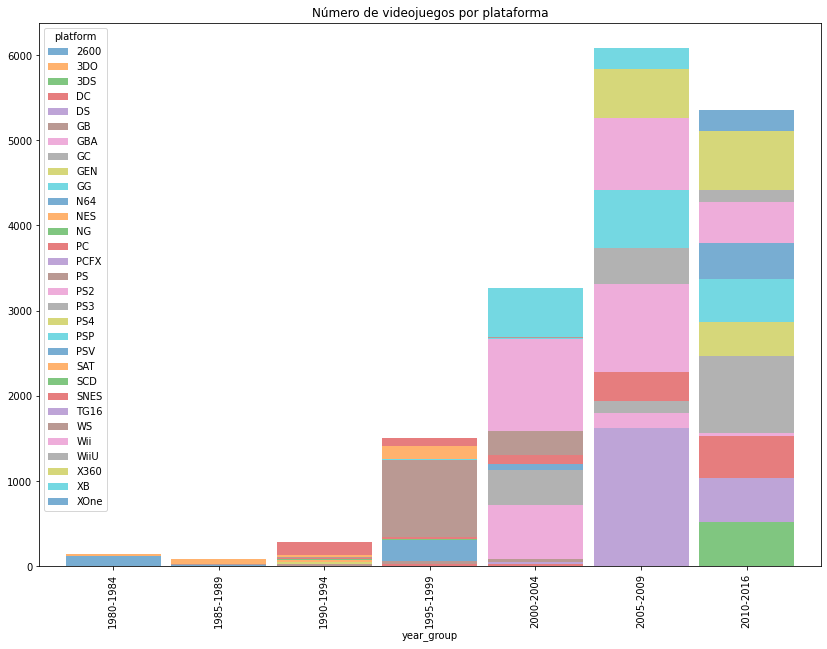

In [64]:
d=data_game.pivot_table(index="year_group", columns="platform", values="name", aggfunc="count")
d.plot(kind="bar", figsize=(14,10), stacked = 'True', alpha=0.6, width = 0.9, title="Número de videojuegos por plataforma")

- El período con mayor auge fue 2005-2009, seguido por 2010-2016. En las décado de los 80 y mediados de los 90 casi no hubo lanzamiento de juegos por plataformas. 
- En el período 2005-2009, DS tuvo el mayor número de lanzamientos de videojuegos, seguido por PS2 y Wii. Ya para 2010-2016, destacan otras plataformas como PS3 y X360.
- Se ratifica la baja actividad en la década de los 80 y mediados de los 90, solo alcanza a destacar un poco SNES, Atari 2600, N64, PS y SAT.

<AxesSubplot:title={'center':'Número de juegos en el año 2005-2009'}, xlabel='platform', ylabel='número de juegos'>

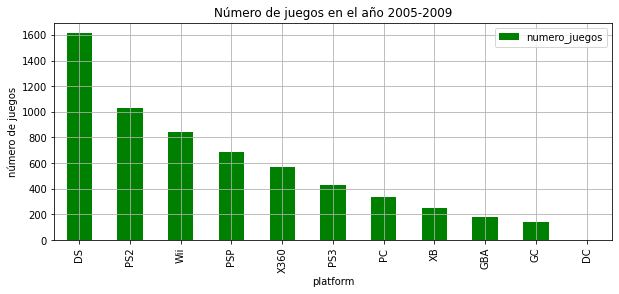

In [65]:
#numero de juegos lanzados por plataforma en el periodo 2005 - 2009
x1=data_game.query('year_group=="2005-2009"').pivot_table(index="platform", values="name", aggfunc="count")
x1.columns=["numero_juegos"]
x1.sort_values(by="numero_juegos", ascending=False).plot(kind="bar", grid=True, figsize=(10,4), title="Número de juegos en el año 2005-2009", color="green", ylabel="número de juegos")


<AxesSubplot:title={'center':'Número de juegos en el año 2010-2016'}, xlabel='platform', ylabel='número de juegos'>

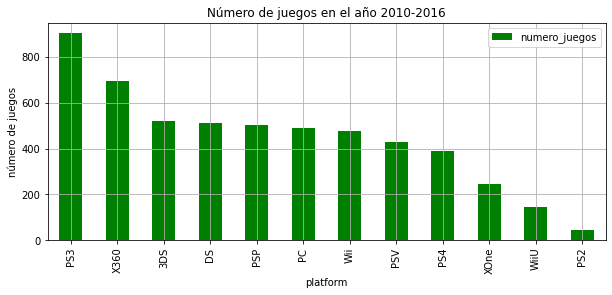

In [66]:
#numero de juegos lanzados por plataforma en el periodo 2005 - 2009
x2=data_game.query('year_group=="2010-2016"').pivot_table(index= "platform", values="name", aggfunc="count")
x2.columns=["numero_juegos"]
x2.sort_values(by="numero_juegos", ascending=False).plot(kind="bar", grid=True, figsize=(10,4), title="Número de juegos en el año 2010-2016",color="green", ylabel="número de juegos")

<AxesSubplot:title={'center':'Número de juegos en el año 2000-2004'}, xlabel='platform', ylabel='número de juegos'>

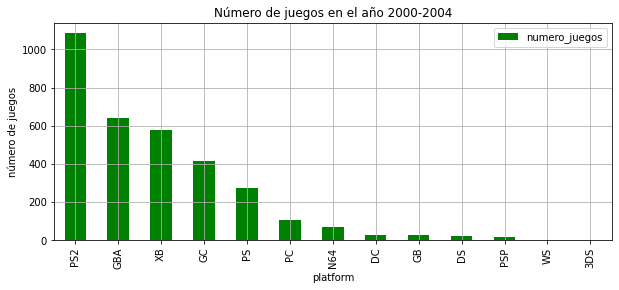

In [67]:
#numero de juegos lanzados por plataforma en el periodo 2000 - 2004
x3=data_game.query('year_group=="2000-2004"').pivot_table(index="platform", values="name", aggfunc="count")
x3.columns=["numero_juegos"]
x3.sort_values(by="numero_juegos", ascending=False).plot(kind="bar", grid=True, figsize=(10,4), title="Número de juegos en el año 2000-2004", color="green", ylabel="número de juegos")

<AxesSubplot:title={'center':'Número de juegos en el año 2005-2016'}, xlabel='year_group', ylabel='número de juegos'>

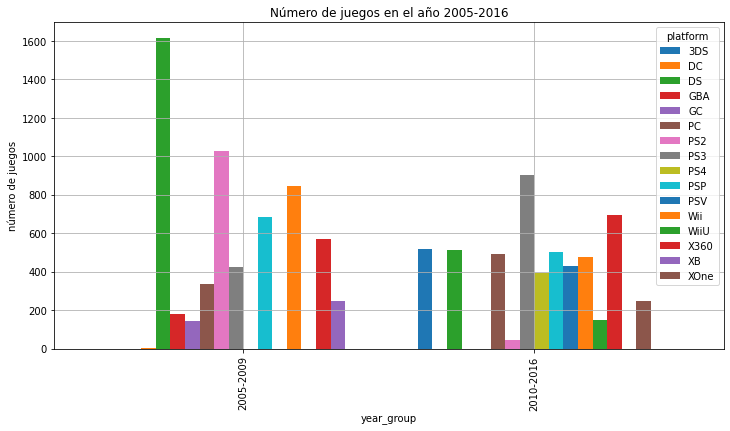

In [68]:
#numero de videojuegos lanzados en 2005-2016
data_game.query('year_group==("2010-2016", "2005-2009")').pivot_table(index="year_group", columns="platform", values="name", aggfunc="count").plot(kind="bar", title="Número de juegos en el año 2005-2016", width=0.8, figsize=(12,6),  ylabel="número de juegos", grid=True)

- En estos gráficos se aprecia que DS fue la plataforma que más lanzó juegos en el período 2005-2009, cediéndole el primer lugar posteriormente a PS3 en los años 2010-2016.
- PS2 estuvo posicionada en el primer lugar en los años 2000-2004 y ocupó el último lugar en el 2010-2016.
- El nintendo 3DS después de ver sus últimos ingresos en el 2000-2004, reaparece con una nueva cónsola en el 2010-2016, recuperando la posición 8, nada mal!!!!

<AxesSubplot:title={'center':'Número de juegos por plataforma'}, xlabel='platform', ylabel='número de juegos'>

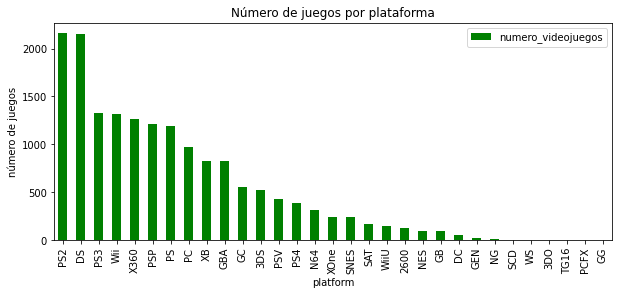

In [69]:
#número de videojuegos por plataformas
numero=data_game.pivot_table(index="platform", values="name", aggfunc="count")
numero.columns=["numero_videojuegos"]
numero.sort_values(by="numero_videojuegos", ascending=False).plot(kind="bar",figsize=(10,4), ylabel="número de juegos", color="green", title="Número de juegos por plataforma")

<AxesSubplot:title={'center':'Número de videojuegos por año'}, xlabel='year_of_release', ylabel='número de juegos'>

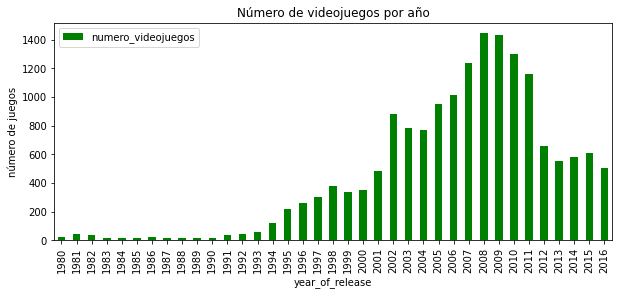

In [70]:
#número de videojuegos por años
numero_year=data_game.pivot_table(index="year_of_release", values="name", aggfunc="count")
numero_year.columns=["numero_videojuegos"]
numero_year.plot(kind="bar",figsize=(10,4),ylabel="número de juegos", color="green", title="Número de videojuegos por año" )

Estas dos últimas gráficas muestran que:
- Los años 2008 y 2009 fueron los mejores años para lanzamientos de videojuegos, por cuanto las plataformas dejaron a la venta su gran repertorio.
- A mediados de la década de los 90 comienza el despegue de este gran negocio de los videojuegos. Décadas anteriores, este mercado era muy nuevo y poco explotado. (jugabamos en la calle y juegos de mesa.....que tiempos...).
- PS2 y DS fueron las plataformas con más ventas, aventajando a sus competidores PS3, Wii, X360, PSP y PS, por más de 500 juegos, una marcada diferencia!!!

<div id="ventas"/>

### Ventas por plataformas y años 

In [71]:
data_game.pivot_table(index=["year_group", "platform"], values="name", aggfunc="count")

name
year_group platform      
1980-1984  2600       120
           NES         19
           PC           1
1985-1989  2600        13
           DS           1
...                   ...
2010-2016  PSV        430
           Wii        476
           WiiU       147
           X360       694
           XOne       247

[68 rows x 1 columns]

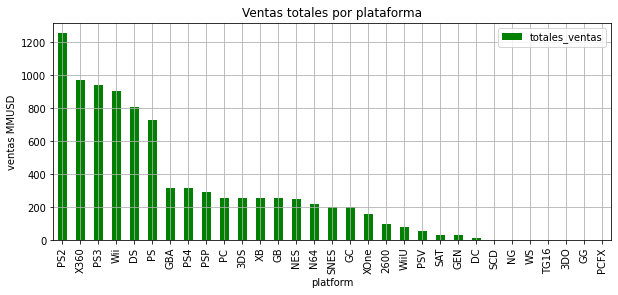

<AxesSubplot:ylabel='Frequency'>

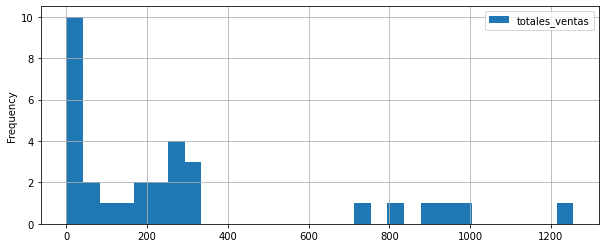

In [72]:
#Ventas por plataformas
ventas_plataformas=data_game.pivot_table(index="platform", values="totales_ventas", aggfunc="sum")
ventas_plataformas.sort_values(by="totales_ventas", ascending=False).plot(kind="bar",figsize=(10,4), ylabel="ventas MMUSD", title="Ventas totales por plataforma",  color="green", grid=True)
plt.show()
ventas_plataformas.plot(kind="hist", bins=30, figsize=(10,4), grid=True)

In [73]:
data_game["totales_ventas"].describe()

count    16713.000000
mean         0.533460
std          1.548343
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: totales_ventas, dtype: float64

- Las mayores ventas reportadas por videojuego corresponden a PS2, que también resultó ser la plataforma que reportó mayores lanzamientos de juegos, nada mal para la compañia Sony, que logra posicionar a la PS2 como la más vendida, superando su antecesora la PS, que se ubica para este estudio en la posición 6 de ventas y 7 en número de videojuegos lanzados. Esto va dejando el camino abierto para sus predecesoras la PS3, PS4 y hoy en día PS5, las cuales vemos comienzan a ganar posiciones, definitivamente Sony con sus PS marca historia.
- En el histograma se observa un fuerte pico en valores por debajo de los 50 MM de dólares, luego se aprecia un segundo pico alrededor de los 300 MMUSD y ya finalmente valores atípicos de baja frecuencia por encima de los 700 MM de dólares.

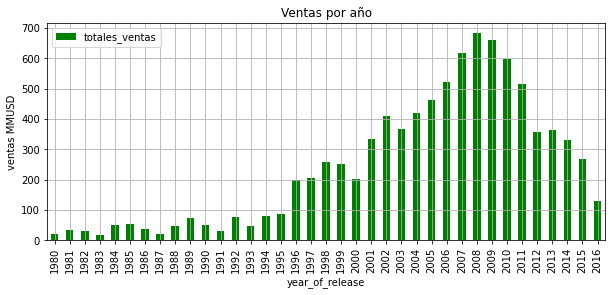

<AxesSubplot:>

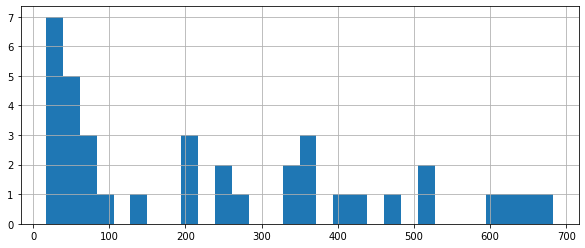

In [74]:
#ventas por año
ventas_year=data_game.pivot_table(index= "year_of_release", values= "totales_ventas", aggfunc="sum")
ventas_year=ventas_year.reset_index()
ventas_year.plot(x="year_of_release", y= "totales_ventas", kind= "bar", figsize=(10, 4), color="green", title="Ventas por año",grid=True, ylabel="ventas MMUSD" )
plt.show()
ventas_year["totales_ventas"].hist(bins=30, figsize=(10,4), grid=True )

Las ventas totales por año, muestran que el 2008 seguido muy de cerca por 2009, 2007 y 2010 fueron los años de mayores ventas para los videojuegos. Su distribución muestra asimetría positiva (media mayor a la mediana) con un fuerte pico en valores por debajo de 50 MM de dólares de las ventas por año, posteriormente se observan picos a 200, 360 y 520 MM de dólares. Hay valores extremos marcados. 

<AxesSubplot:>

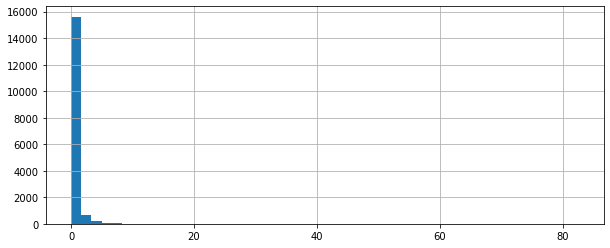

In [75]:
data_game["totales_ventas"].hist(bins=50, figsize=(10,4))

La distribución de las ventas totales es definitivamente asímetrica positiva, con casi todos los valores concentrados alrededor de 0.17 MM de dólares, ya el tercer cuártil se aproxima a los 0.5 MMUSD. El valor máximo reportado (82.54 MM) excede muy notoriamente a los valores promedio y mínimo, la brecha es muy grande. 

De las gráficas anteriores se concluye:
- El período de tiempo de mayor auge en videojuegos fue a partir del 2000, siendo el período 2005 - 2009 el de mayor boom, seguido del período 2010 - 2016.
- El 68% de los videojuegos fueron lanzados entre el 2005-2016.
- En el período de más auge (2005-2009), la plataforma DS fue la que mayor cantidad de juegos lanzó, seguido de PS2, Wii, PSP, X360 y PS3. En este mismo período las de menores ventas fueron DC, GC, GBA, XB y PC.
- En el período 2010-2016 la plataforma con mayor lanzamiento de videojuegos fue PS3 seguido de X360, 3DS, DS, PC, Wii, PSV y PS4.
- En el período 2000-2004 PS2 es la plataforma que más lanzó videojuegos seguido de GBA, XB y GC.
- La plataforma DS en el año 2000 reportó muy pocos lanzamientos de videojuego, ya para el 2005 se convirtió en la de mayor lanzamientos de videojuegos, y para el 2010 ya se ubicó en 4ta posición.
- La plataforma PS2 en el año 2000 reportó la mayor cantidad de lanzamientos de videojuegos, ya para el 2005 bajó a segundo lugar y para el 2010 se convirtió en la de menor lanzamientos de videojuegos.
- Las plataformas X360 y PS3 aparecen en 5ta y 6ta posición en el 2005 y ya en el 2010 se ubicaron en segundo y primer lugar respectivamente y en este período aparece la PS4.
- La década de los 80 y mediado de los 90 fueron desérticas para los videojuegos.
- La plataforma PS2 es la de mayor venta, seguida por X360, PS3, Wii, DS y PS.
- Las plataformas que más juegos lanzaron fueron PS2 y DS, seguidas por PS3, Wii, X360, PSP, PS, PC, XB, GBA, GC, 3DS y PSV.
- Las plataformas que praticamente no lanzaron videojuegos al mercado y por supuesto no reportaron casi ventas fueron GC, PCFX, 3DO, WS, SCD, NG y GEN.

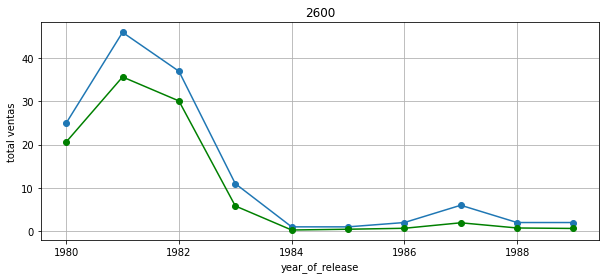

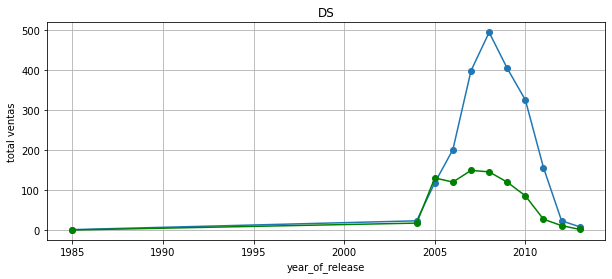

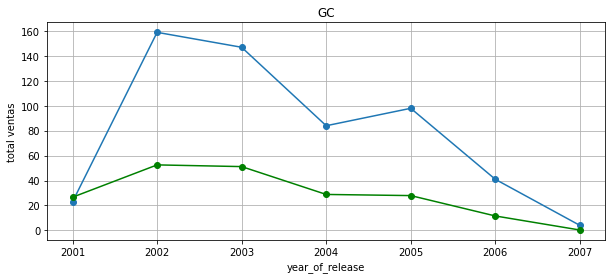

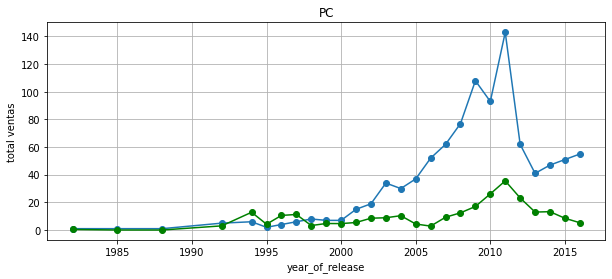

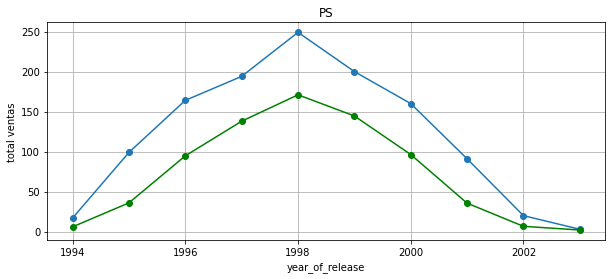

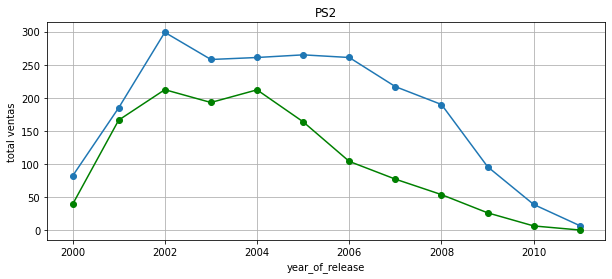

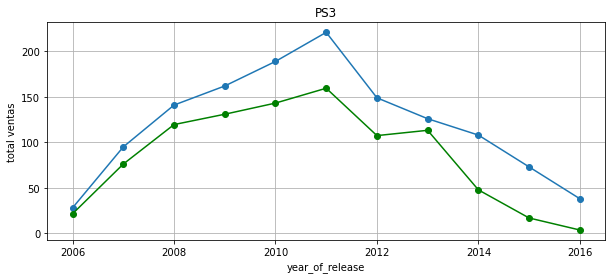

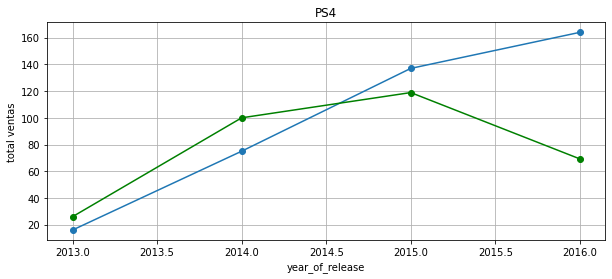

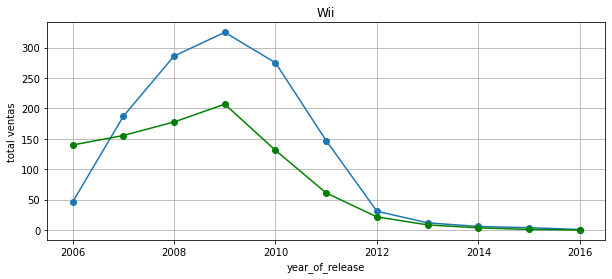

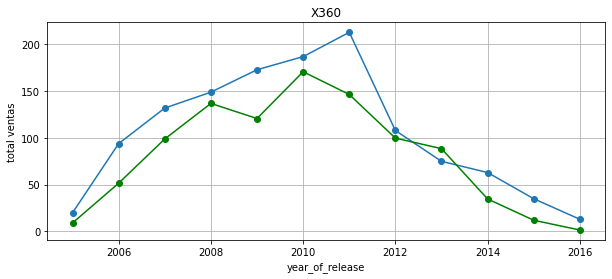

In [76]:
#Gráficas de ventas por año y por plataformas
for tipo, datos in data_game.query('platform in ("DS", "PS2", "Wii", "PS4", "X360", "PS3", "PS", "2600", "PC", "GC")').groupby("platform"):
    datos.groupby("year_of_release")["name"].count().plot(kind='line', style='o-', figsize=(10,4), grid=True)
    datos.groupby("year_of_release")["totales_ventas"].sum().plot(kind='line', style='o-', color="green", grid=True, ylabel="total ventas", figsize=(10,4))
    plt.title(tipo)
    plt.show()

De las gráficas de arriba se observa que en casi todos los casos hay un pico de máximo lanzamientos y por consiguiente de ventas para posteriormente declinar, esto se debe muy probablemente a la salida al mercado de una nueva plataforma, más novedosa con incorporación de tecnología de vanguardia, dejando obsoleta las versiones anteriores:

- La plataforma Atari 2600 tuvo su boom en ventas en 1981 y a partir de allí comenzaron a descender los ingresos hasta 1984 donde alcanzó sus valores mínimos.
- La plataforma DS comenzó en 2004 mostrando su pico en 2007 y a partir de ese valor comenzó a declinar.
- La plataforma GC tuvo su máximo de lanzamientos en el 2002 y de allí comenzó su baja en producción hasta el 2007.
- La plataforma PC que comenzó en 2000, tuvo su máximo esplendor en el año 2011, disminuyendo hasta el 2013 para nuevamente tener un repunte.
- La familia de los PS, PS2, PS3 tuvieron sus picos máximos de lanzamientos en los años 1998, 2002, 2011 respectivamente con posterior descenso. La PS2 mantuvo un largo período de estabilidad hasta el 2006, año en el que aparece la PS3.
- La PS4 inició en el 2013 y para el 2016 se mantuvo en ascenso, y es de esperarse que con la aparición de la PS5 ya se observe el declive de la PS4.
- La plataforma Wii tuvo su máximo pico en el 2009 y de allí comenzó su declive.
- La plataforma X360 tuvo su época dorada en el 2011, después de sus inicios en el 2005, y de allí un rápido descenso.

<AxesSubplot:title={'center':'Ventas por las 7 mejores plataformas'}, xlabel='year_of_release', ylabel='ventas'>

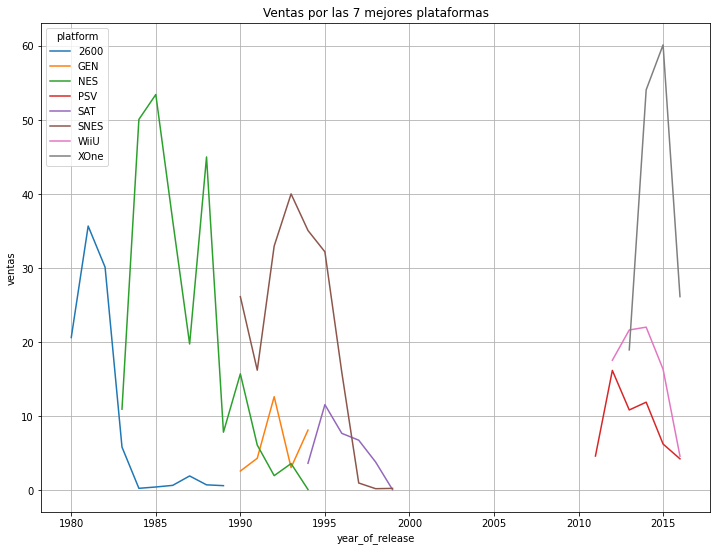

In [77]:
data_game.query('platform==("SNES", "2600", "PSV", "NES", "WiiU", "XOne", "SAT", "GEN")').pivot_table(index="year_of_release", columns="platform", values="totales_ventas", aggfunc="sum").plot(kind="line", ylabel="ventas", grid=True, title="Ventas por las 7 mejores plataformas" ,figsize=(12,9))

- Se observa que las plataformas PS2, X360, PS3, Wii y DS son las cinco que más vendieron videojuegos.
- Hay un gran número de plataformas con márgenes de ventas muy bajos. 
- El mayor boom ocurrió en el 2008-2009 y plataformas como SAT, Atari 2600 llegaron a ser populares alcanzando ingresos que superaban los 50 MMUSD en su tiempo, pero que luego desaparecieron, solo quedando su recuerdo. 
- La plataforma NES se mantuvo dueña del mercado por un poco más de 10 años, su aparición fue la causante de la caída del Atari 2600, y fue hasta aproximadamente 1988 que se aceleró su descenso cuando surgió en el mercado la GB, la cual tuvo presencia en el mercado por poco tiempo. Durante su reinado tuvo 2 picos de ventas máximos: 1985 y 1997.
- Las plataformas GEN y SNES surgieron a inicios de la década de los 90, con un pico que se remontó hacia 1993, pero posteriormente declinaron y practicamente desaparecieron en 1994 y 1998 respectivamente. Estas plataformas llegaron a alcanzar ventas en el orden de los 40MMUSD (SNES) y 20 MMUSD (GEN).
- En el transcurrir de los años han aparecido varias plataformas que no han tenido un éxito marcado en ventas, otras hicieron debut y despedida (TG16, 3DO, WS) y otras se lograron consolidar acaparando el mercado (PS en todas sus versiones, DS, X360) y sacando a las más pequeñas del mercado (NES, N64, XB).
- La plataforma 3DS de la compañia Nintendo, no tuvo el éxito esperado, pues tras su debut en el 2010 con ventas en el orden de 60MMUSD se precipitó rápidamente al abismo llegando a tocar los 20MMUSD en un lapso de 5 años.
- La plataforma GBA lanzó videojuegos en el 2000 manteniéndose en el mercado durante 7 años, llegando a reportar un pico de casi 75MMUSD en el año 2004.
- La plataforma PC se mantuvo sin despegar desde 1994 hasta 2006 cuando comenzó a incrementar sus ventas alcanzando un máximo de 40MMUSD en el 2010.
- Las plataformas SCD, NG, WS, TG16, 3DO, GG, PCFX y Xone muestran unas ventas muy bajas.

<AxesSubplot:title={'center':'Ventas para las 7 mejores plataformas'}, xlabel='year_of_release', ylabel='ventas'>

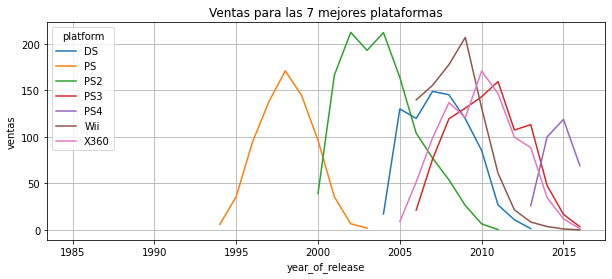

In [78]:
plat_mayor_venta = data_game.query('platform==("PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4")').pivot_table(index="year_of_release", columns="platform", values="totales_ventas", aggfunc="sum")
plat_mayor_venta.plot(kind="line", ylabel="ventas", grid=True, figsize=(10,4), title="Ventas para las 7 mejores plataformas" )

De esta gráfica se observa :
- Las cónsolas de PS2, PS3, X360 y DS son las que más tiempo permanecen con ventas altas, es decir, se consolidan por más tiempo en el mercado, recolectando por concepto de ventas mayores ingresos.
- Las plataformas de PS y Wii son las que más rápido pierden popularidad, dando un pico rápido en ventas pero que cae rápidamente.
- Entre 1995 y 2002 se mantuvo PS reinando en ventas, hasta que hizo su debut el PS2 en el año 2000, que lo desplazó rápidamente, ya un poco antes del 2004 aparece DS destronando a PS2. En el 2006 llega el Wii que se mantuvo poco tiempo en el mercado y provocó la caída del DS.
- En el 2005 surgen a la par el PS3 y el X360, posicionándose ambos muy bien en el mercado hasta el 2011 cuando comienza su declive.
- Aunque el PS4 no es líder en ventas, se graficó porque su debut fue reciente a la fecha del análisis y se mantiene actualmente.

<div id="ventas-plat"/>

### Variación en ventas por plataforma 

In [79]:
#Análisis del tiempo de vigencia de las plataformas
duracion=data_game.pivot_table(index="platform", values="year_of_release", aggfunc=["min", "max"]).reset_index()
duracion.columns= ["platform","year_min", "year_max"]
duracion["duracion_plat"]=duracion["year_max"]-duracion["year_min"]
duracion.sort_values(by="duracion_plat", ascending= False)

,platform,year_min,year_max,duracion_plat
13,PC,1982,2016,34
4,DS,1985,2013,28
19,PSP,1997,2015,18
2,3DS,2000,2016,16
5,GB,1988,2001,13
28,X360,2005,2016,11
11,NES,1983,1994,11
16,PS2,2000,2011,11
3,DC,1998,2008,10
26,Wii,2006,2016,10


<AxesSubplot:>

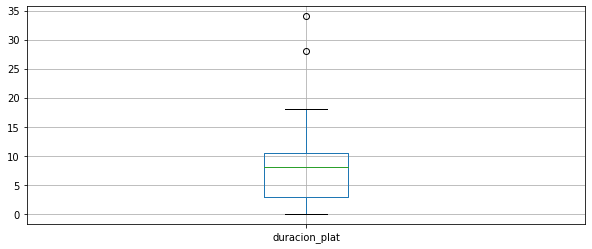

In [80]:
#boxplot para tiempo de permanencia en el mercado
duracion.boxplot(column="duracion_plat", figsize=(10, 4))

In [81]:
def funcion_duracion(df, columna):
    p1 = df[columna].describe() 
    p2 = df.query('platform!=("DS", "PC")')[columna].describe()
    d = pd.concat([p1, p2], axis=1)
    d.columns = ["todas_plataformas", "sin DS y PC"]
    return d
funcion_duracion(duracion, "duracion_plat")

,todas_plataformas,sin DS y PC
count,31.000000,29.000000
mean,8.354839,6.793103
std,7.657451,4.798655
min,0.000000,0.000000
25%,3.000000,3.000000
50%,8.000000,7.000000
75%,10.500000,10.000000
max,34.000000,18.000000


- Las 5 plataformas más duraderas en el mercado de los videojuegos, en orden descendente son: PC, DS, 2600, PSP y 3DS, sin embargo, no son las que más lanzamientos han realizado, solo coincide la DS.
- Se observa en el cálculo duración de 0 para algunas plataformas, estas son las que tuvieron debut y despedida en el mismo año. Estos valores serán convertidos en 1 para poder utilizarlos más adelantes en el promedio de las ventas.
- Las plataformas PC y DS muestran valores atípicos con tiempos excedidos de duración, hay muchos fans en el mundo. 
- Eliminando los valores atípicos, se determinó que el tiempo promedio de vida de las plataformas es de 7 años, y el 50% de los datos ya alcanza este promedio.



In [82]:
#plataformas que se mantienen en el mercado hasta el 2016
plataformas_actuales = duracion.query('year_max==2016')
plataformas_actuales = plataformas_actuales["platform"]
plataformas_actuales


2      3DS
13      PC
17     PS3
18     PS4
20     PSV
26     Wii
27    WiiU
28    X360
30    XOne
Name: platform, dtype: object

In [83]:
#sustitución del valor 0 por 1 en el tiempo de permanencia en el mercado
duracion.loc[duracion["duracion_plat"]==0, "duracion_plat"]=1

<div id="ventas-tot"/>

### Ventas totales y promedio por juego y plataforma 

A continuación se hace el análisis tomando en cuenta los años previos al año de pronóstico(2017) por lo que se considerará el período 2012 - 2016 que abarca las plataformas que se mantienen en el mercado.

<AxesSubplot:title={'center':'totales_ventas'}, xlabel='platform'>

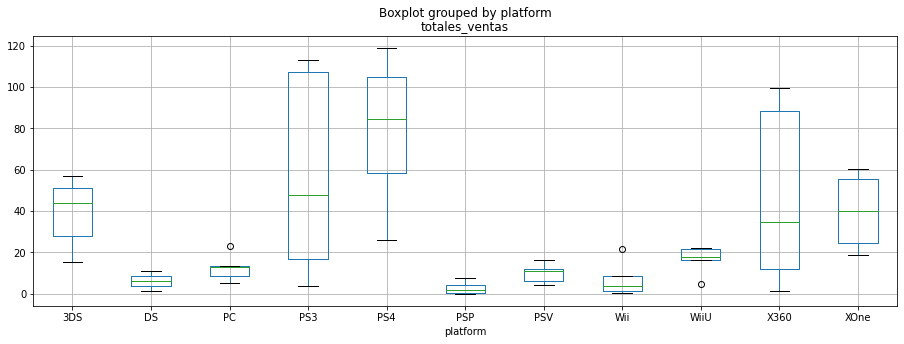

In [84]:
#diagrama boxplot por plataforma
ventas_por_plataforma=data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016)').pivot_table(index=["platform", "year_of_release"], values="totales_ventas", aggfunc="sum")
ventas_por_plataforma.boxplot(by="platform", column="totales_ventas", figsize=(15,5))
  

En el boxplot se observa:
- PS4, PS3 y X360 ostentan los primeros lugares en ventas con grandes cantidades de datos.
- En el caso de 3DS, PS4, PSV, PC la mayor concentración de datos está entre el primer cuartil y la mediana, mientrás que para PS3, PSP, Wii, WiiU, X360 y GB la mayor cantidad de datos está por encima de la mediana y hacia el tercer cuartil.
- La familia PS3 y PS4 acaparan el mercado en ventas.
- Se observan pocas plataformas con valores atípicos (PC, Wii).
- Las plataformas Xone y DS tienen al parecer simetria puesto que tienen igual cantidad de datos concentrados entre el primer cuartil y la mediana y el tercer cuartil y la mediana.

<div id="ventas-prom"/>

### Ventas promedios 

<AxesSubplot:title={'center':'Ventas promedio por plataforma'}, xlabel='platform', ylabel='ventas'>

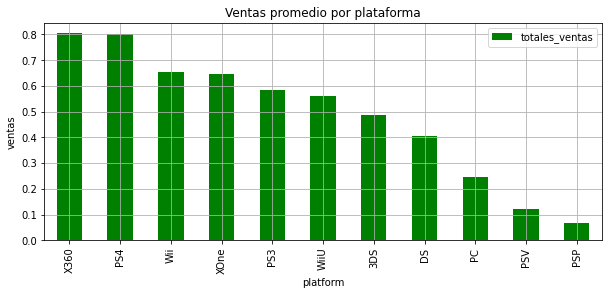

In [85]:
ventas_por_plataforma_mean=data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016)').pivot_table(index="platform", values="totales_ventas", aggfunc="mean")
ventas_por_plataforma_mean.sort_values(by="totales_ventas", ascending=False).plot(kind= "bar", ylabel="ventas", title="Ventas promedio por plataforma" ,figsize=(10, 4), color="green", grid=True)

Con este gráfico se observa una discrepancia, ya que las mayores ventas promedio se le adjudica a las plataforma X360 y no es la líder en ventas. No concuerdan!!!. Se procederá a relacionarla con el tiempo de duración de la plataforma en el mercado, para ello calcularemos primero el número de juegos por plataforma 

In [86]:
data_game_ultimo_periodo = data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016)')

In [87]:
ventas_plataformas_up=data_game_ultimo_periodo.pivot_table(index="platform", values="totales_ventas", aggfunc="sum")
numero_up=data_game_ultimo_periodo.pivot_table(index="platform", values="name", aggfunc="count")
numero_up.columns=["numero_videojuegos"]

In [88]:
duracion_up=data_game_ultimo_periodo.pivot_table(index="platform", values="year_of_release", aggfunc=["min", "max"]).reset_index()
duracion_up.columns= ["platform","year_min", "year_max"]
duracion_up["duracion_plat"]=duracion_up["year_max"]-duracion_up["year_min"]

<AxesSubplot:title={'center':'Ventas por plataforma'}, xlabel='platform'>

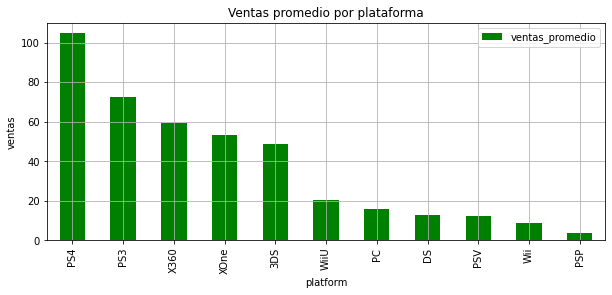

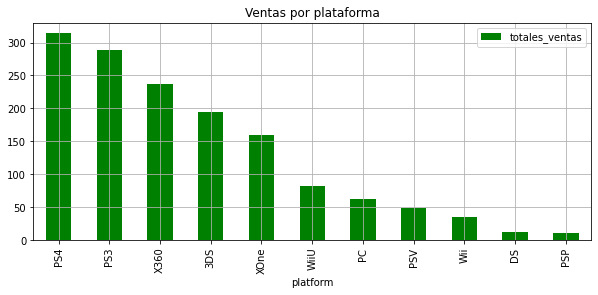

In [89]:
#Estimación de las ventas totales promedio por plataformas
#unión de las pivot_table para ventas y número de plataformas
promedio_ventas_up=pd.concat([ventas_plataformas_up, numero_up], axis=1)
#merge con la tabla de tiempo en el mercado
ventas_totales_promedio_up = promedio_ventas_up.reset_index().merge(duracion_up, on="platform", how="outer")
#cálculo de las columnas ventas promedio y ventas promedio por juego
ventas_totales_promedio_up["ventas_promedio"] = ventas_totales_promedio_up["totales_ventas"] / ventas_totales_promedio_up["duracion_plat"]
ventas_totales_promedio_up["ventas_promedio_juegos"] = ventas_totales_promedio_up["totales_ventas"] / ventas_totales_promedio_up["numero_videojuegos"]
ventas_totales_promedio_up.sort_values(by="ventas_promedio", ascending=False).plot(kind= "bar", x="platform", y="ventas_promedio", ylabel="ventas", title="Ventas promedio por plataforma" ,figsize=(10, 4), color="green", grid=True)
ventas_plataformas_up.sort_values(by="totales_ventas", ascending=False).plot(kind="bar",figsize=(10,4), color="green", grid=True, title="Ventas por plataforma" )

Ahora si resulta comparable y los resultados muestran que la playstation PS4 es la líder en ventas, seguida por su antecesora la PS3, X360, 3DS, Xone, WiiU, PC,...... continúa la familia PS al mando.

<div id="reseñas"/>

### Relación entre reseña de usuarios y ventas 

<AxesSubplot:title={'center':'relacion entre critic_score y ventas'}, xlabel='critic_score', ylabel='totales_ventas'>

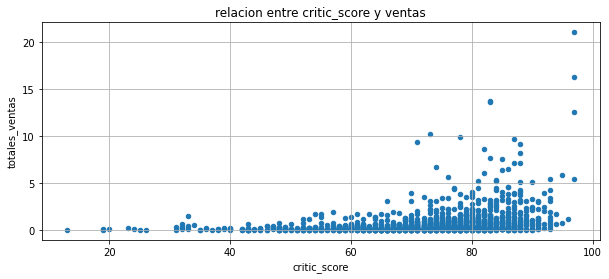

In [90]:
# relación de ventas totales con puntuación de los críticos
data_game_ultimo_periodo.plot(x="critic_score", y="totales_ventas", kind="scatter", figsize=(10,4),grid=True, title="relacion entre critic_score y ventas") 

<AxesSubplot:title={'center':'relación entre user_score y ventas'}, xlabel='user_score', ylabel='totales_ventas'>

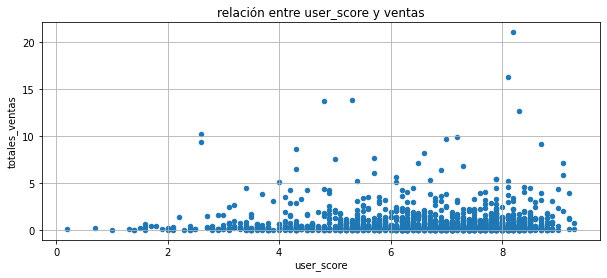

In [91]:
# relación de ventas totales con puntuación de los críticos
data_game["user_score"].replace("tbd", np.nan, inplace = True)
data_game["user_score"]= data_game["user_score"].astype("float")

data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016)').plot(x="user_score", y="totales_ventas", kind="scatter", figsize=(10,4), grid=True, title="relación entre user_score y ventas") 

<AxesSubplot:title={'center':'relación entre user_score y critic_score'}, xlabel='user_score', ylabel='critic_score'>

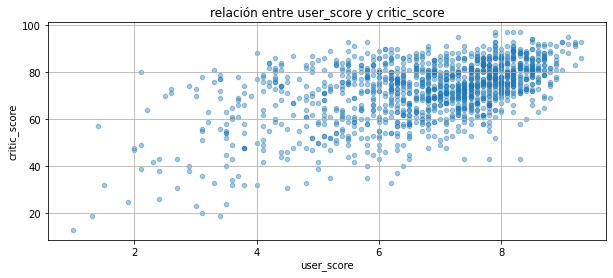

In [92]:
data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016)').plot(x="user_score", y="critic_score", kind="scatter", figsize=(10,4), alpha=0.4, grid=True, title="relación entre user_score y critic_score")

In [93]:
data_game_ultimo_periodo["totales_ventas"].dropna().corr(data_game_ultimo_periodo["critic_score"].dropna(), method="spearman")

0.4302128536867824

Los cálculos para la correlación entre las ventas y las columnas de clasificación mostraron lo siguiente:

- La columna de ventas totales tiene una correlación positiva (0.43), con la columna "critic_score", esto significa que a medida que aumenta la calificación (se aproxima a 100), aumentan las ventas de los videojuegos, ya que una calificación alta significa que el videojuego es bueno y por consiguiente TODOS los quieren jugar. Caso contrario si la calificación es baja, esto es señal de que el videojuego no es muy bueno y el usuario prefiere invertir en otro juego con mejor calificación.
- En la gráfica se corrobora este índice de relación ya que las mayores ventas se tienen cuando la calificación está por encima de los 75. Por encima de esta calificación las ventas logran sus valores máximos y ninguna obtuvo una calificación de 100.
- La gráfica muestra que para calificaciones de usuario, superiores a 5, las ventas alcanzan sus máximos, siendo 8 el valor que corresponde a un valor extremo de venta.
- Las columnas de "critic_score" y "user_score" se relacionan entre si de manera positiva, es decir, una alta calificación profesional resultará muy probablemente en una alta calificación de usuario.
- La gráfica muestra que la mayor concentración de datos se da a valores altos de calificación tanto de profesionales (mayor a 70) como de usuario(mayor de 6) y la mayor dispersión se alcanza en valores bajos de calificación.

<AxesSubplot:title={'center':'calificación profesional para videojuegos por plataforma'}, xlabel='platform'>

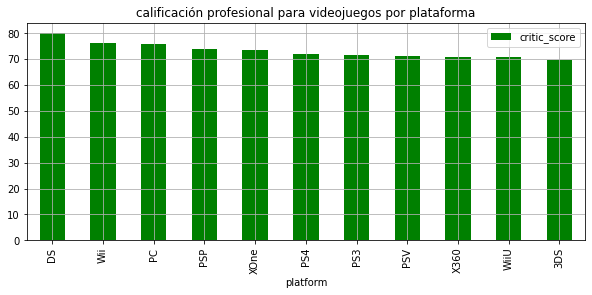

In [94]:
(data_game_ultimo_periodo.pivot_table(index="platform", values="critic_score")).sort_values(by="critic_score", ascending=False).plot(kind="bar", title="calificación profesional para videojuegos por plataforma" , color="green", grid=True, figsize=(10,4))

- Las mejores críticas profesionales las tiene la plataforma de DS que paradojicamente no es la plataforma de mayores ventas, al contrario es de las de menor ventas, uhmmm, esto nos indica que los usuarios prefieren otras características de los videojuegos (como el género) a considerar.
- Todas las plataformas tienen calificaciones por encima de 70 y las de mayores ventas oscilan alrededor de 75.

<div id="mas-vendido"/>

### Videojuegos en diferentes plataformas 

In [95]:
#Relación entre los videojuegos y las 11 plataformas del periodo 2012-2016
data_dif_plat=(data_game_ultimo_periodo.pivot_table(index="name", columns="platform", values="totales_ventas", aggfunc="count", margins=True)).dropna(thresh=2)

In [96]:
#Relación entre los videojuegos y las 11 plataformas del periodo 2012-2016
data_dif_plat_ventas=(data_game_ultimo_periodo.pivot_table(index="name", columns="platform", values="totales_ventas", aggfunc="sum", margins=True)).dropna(thresh=2)
data_dif_plat_ventas["total_juegos"]=11-data_dif_plat.isnull().sum(axis=1)
data_dif_plat_ventas.sort_values(by="total_juegos", ascending=False).head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All,total_juegos
name,,,,,,,,,,,,,
All,195.08,12.55,63.34,288.86,314.14,11.43,49.44,35.37,82.19,236.62,159.32,1448.34,11
FIFA 14,0.23,NaN,0.40,6.46,3.01,0.19,0.41,0.38,NaN,4.22,1.16,16.46,9
LEGO Marvel Super Heroes,0.89,0.38,0.17,1.83,1.62,NaN,0.51,NaN,0.74,2.22,1.05,9.41,9
The LEGO Movie Videogame,0.69,NaN,0.06,0.93,0.67,NaN,0.30,NaN,0.64,1.27,0.53,5.09,8
FIFA 15,0.46,NaN,0.29,4.28,6.08,NaN,0.60,0.56,NaN,2.92,2.18,17.37,8


In [97]:
(data_dif_plat_ventas.query('total_juegos==(9,8)')).sort_values(by="All", ascending=False).head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All,total_juegos
name,,,,,,,,,,,,,
FIFA 15,0.46,NaN,0.29,4.28,6.08,NaN,0.60,0.56,NaN,2.92,2.18,17.37,8
FIFA 14,0.23,NaN,0.40,6.46,3.01,0.19,0.41,0.38,NaN,4.22,1.16,16.46,9
FIFA Soccer 13,0.29,NaN,0.40,8.17,NaN,0.34,0.44,0.69,0.48,5.16,NaN,15.97,8
LEGO Marvel Super Heroes,0.89,0.38,0.17,1.83,1.62,NaN,0.51,NaN,0.74,2.22,1.05,9.41,9
The LEGO Movie Videogame,0.69,NaN,0.06,0.93,0.67,NaN,0.30,NaN,0.64,1.27,0.53,5.09,8


Observando la tabla anterior:
- El juego FIFA 15 se comercializó en 8 de las 11 plataformas que más vendieron videojuegos en los últimos años, recaudando un total de 17.37 MM de dólares. La versión de este juego en las cónsolas de PS4 y PS3 fueron las más vendidas.
- El juego FIFA 14 se comercializó en 9 de las 11 plataformas que más vendieron videojuegos en los últimos años, fue uno de los más populares junto a LEGO Marvel Super Heroes, sin embargo no alcanzó superar a la versión más nueva de FIFA 15. Los ingresos de FIFA 14 y LEGO Marvel Super Heroes fueron de 16.46 y 9.41 MM de dólares respectivamente. Como era de esperarse FIFA 14 se vendió más en PS3 (muy probablemente la PS4 estaba entrando en el mercado y cuando salió ya trajo la nueva versión FIFA 15) y X360. Por su parte LEGO se vendió más en X360 seguido PS3.
- El videojuego FIFA Soccer 13 se lanzó en 8 de las 11 plataformas con mayores ventas, recaudando un total de 15.97 MMUSD, siendo las plataformas PS3 y X360 las que más ingresos por ventas percibieron. No se comercializó en PS4 de seguro porque aún no salia al mercado esta plataforma.
- El videojuego LEGO Movie Videogame alcanzó a recaudar 5.09 MM de dólares estando disponible en 8 plataformas.
- En fin los juegos de FIFA resultaron ser los ganadores en el período 2012-2016 y la familia PS la que más lo comercializó.

In [98]:
data_game_ultimo_periodo.pivot_table(index="platform", columns="genre", values="totales_ventas", aggfunc="sum", margins=True)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
platform,,,,,,,,,,,,,
3DS,45.49,4.39,8.46,9.45,19.11,2.66,0.37,79.33,0.20,20.12,4.23,1.27,195.08
DS,1.82,0.06,NaN,0.48,0.69,0.10,NaN,9.08,NaN,0.21,0.11,NaN,12.55
PC,13.77,0.87,0.12,0.73,0.14,0.03,1.23,13.65,14.28,9.22,3.26,6.04,63.34
PS3,115.75,6.09,11.00,8.88,4.26,0.04,11.56,22.62,60.39,1.85,44.84,1.58,288.86
PS4,96.10,6.34,8.65,8.19,7.69,0.02,12.14,28.99,88.56,1.23,55.61,0.62,314.14
PSP,3.76,1.67,0.36,0.65,NaN,NaN,NaN,2.81,NaN,0.06,1.41,0.71,11.43
PSV,16.33,3.79,2.21,4.32,2.26,0.06,2.21,12.31,2.34,0.05,3.21,0.35,49.44
Wii,10.75,0.19,NaN,17.86,2.25,0.66,0.01,1.06,NaN,0.22,2.11,0.26,35.37
WiiU,19.07,0.17,6.27,12.46,21.53,1.32,7.87,2.89,6.01,0.20,3.16,1.24,82.19


<AxesSubplot:title={'center':'ventas por género'}, xlabel='genre', ylabel='ventas'>

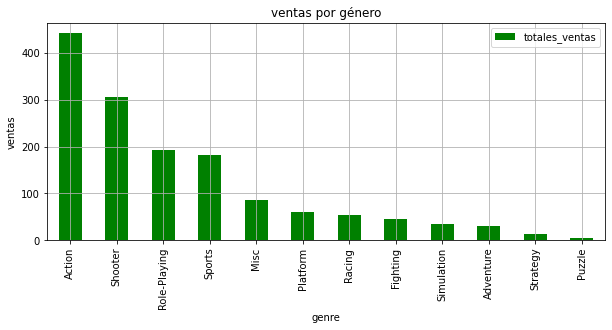

In [99]:
(data_game_ultimo_periodo.pivot_table(index="genre", values="totales_ventas", aggfunc="sum")).sort_values(by="totales_ventas", ascending=False).plot(kind="bar", ylabel="ventas", title="ventas por género", figsize=(10,4), color="green", grid=True)

De acuerdo al género que más vende, en el período 2012-2016, se concluye que son los videojuegos de "Action" los más vendidos (31%), seguido del género de "shooter" (21%) y en tercer lugar el de "Role-Playing" (13%). Los juegos de Puzzle (menor a 1%), "Strategy" (1%) y "Adventure" (2%) son los que menos se venden.

<div id="Análisis-región"/>

## Análisis por región 

Se procederá a continuación a realizar análisis por las 4 regiones de ventas suministradas en la data.

<div id="na"/>

### Perfil región Norteamérica

<AxesSubplot:title={'center':'ventas Norteamérica'}, xlabel='platform', ylabel='ventas'>

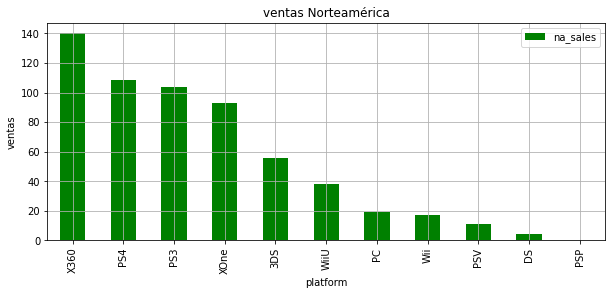

In [100]:
#Perfil Norteamerica
na_ventas=data_game_ultimo_periodo[data_game_ultimo_periodo["na_sales"]>0]
na_ventas_plat=na_ventas.pivot_table(index="platform", values="na_sales", aggfunc="sum")
na_ventas_plat.sort_values(by="na_sales", ascending=False).plot(kind="bar", color="green", figsize=(10,4), grid=True, title="ventas Norteamérica", ylabel="ventas" )

In [101]:
#Cálculos estadísticos
def funcion_estadistica(df, columna, columna1, columna2):
    p1 = df[columna].describe() 
    p2 = df[columna1].describe()
    p3 = df[columna2].describe()
    d = pd.concat([p1, p2, p3], axis=1)
    d.columns = ['ventas','critic_score', 'user_score']
    return d

funcion_estadistica(na_ventas,"na_sales", "critic_score", "user_score")

,ventas,critic_score,user_score
count,1688.000000,1097.000000,1351
mean,0.350521,72.743847,NaN
std,0.705718,12.798517,NaN
min,0.010000,13.000000,NaN
25%,0.050000,67.000000,NaN
50%,0.130000,75.000000,NaN
75%,0.360000,81.000000,NaN
max,9.660000,97.000000,NaN
unique,NaN,NaN,83
top,NaN,NaN,tbd


<AxesSubplot:>

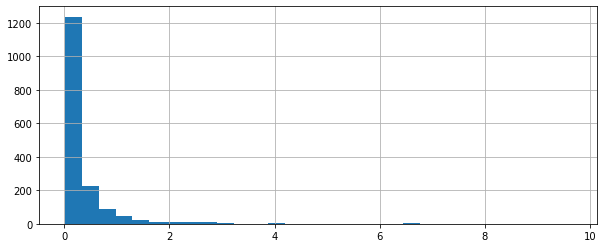

In [102]:
na_ventas["na_sales"].hist(bins=30, figsize=(10,4))

<AxesSubplot:title={'center':'ventas Norteamérica'}, xlabel='genre', ylabel='ventas'>

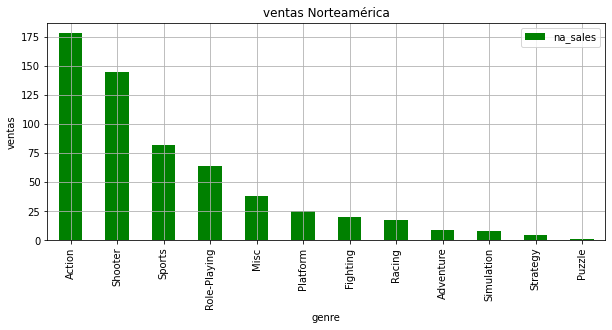

In [103]:
(na_ventas.pivot_table(index="genre", values="na_sales", aggfunc="sum")).sort_values(by="na_sales", ascending=False).plot(kind="bar", color="green", figsize=(10,4), grid=True, title="ventas Norteamérica", ylabel="ventas" )

In [104]:
na_ventas["rating"].value_counts(normalize=True)

M       0.271327
RP      0.209716
T       0.183649
E       0.177133
E10+    0.158175
Name: rating, dtype: float64

Las gráficas obtenidas para la región de Norteamérica muestran lo siguiente:
- Las 5 plataformas que acumularon mayor ventas son: X360, PS4, PS3, Xone y 3DS.
- Los 5 géneros más vendidos fueron: "Action", "Shooter", "Sports", "Role-Playing" y Misc.
- La distribución en las ventas, muestra una asimetría positiva con sesgo a la derecha (la media(0.35) mayor a la mediana(0.13)) con un fuerte pico que se concentra en valores de 0.01 MMUSD.
- De acuerdo a la información estadística, hay valores extremos.
- En la variable "critic_score", la mediana está en 75 y la media un poco por debajo.
- Los rating de mayores ventas son para adolescentes mayores a 17(M), pendientes por revisar y adolescentes.


<div id="eu"/>

### Perfil región Europa

<AxesSubplot:title={'center':'ventas Europa'}, xlabel='platform', ylabel='ventas'>

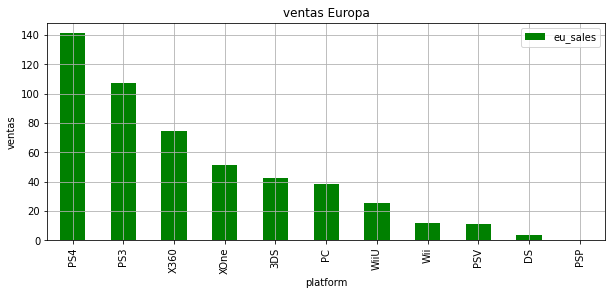

In [105]:
#Perfil Europa
eu_ventas=data_game_ultimo_periodo[data_game_ultimo_periodo["eu_sales"]>0]
eu_ventas_plat=eu_ventas.pivot_table(index="platform", values="eu_sales", aggfunc="sum")
eu_ventas_plat.sort_values(by="eu_sales", ascending=False).plot(kind="bar", color="green", figsize=(10,4), grid=True, title="ventas Europa", ylabel="ventas" )

In [106]:
funcion_estadistica(eu_ventas,"eu_sales", "critic_score", "user_score")

,ventas,critic_score,user_score
count,1818.000000,1170.000000,1450
mean,0.279109,72.690598,NaN
std,0.613655,12.838538,NaN
min,0.010000,13.000000,NaN
25%,0.030000,66.000000,NaN
50%,0.100000,75.000000,NaN
75%,0.270000,81.750000,NaN
max,9.090000,97.000000,NaN
unique,NaN,NaN,84
top,NaN,NaN,tbd


<AxesSubplot:>

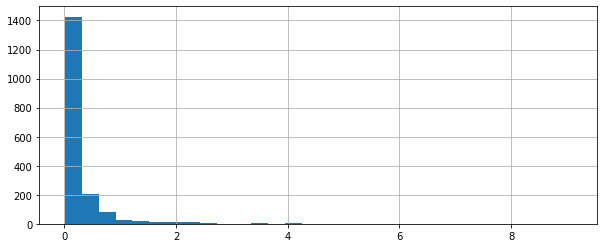

In [107]:
eu_ventas["eu_sales"].hist(bins=30, figsize=(10,4))

<AxesSubplot:title={'center':'ventas Europa'}, xlabel='genre', ylabel='ventas'>

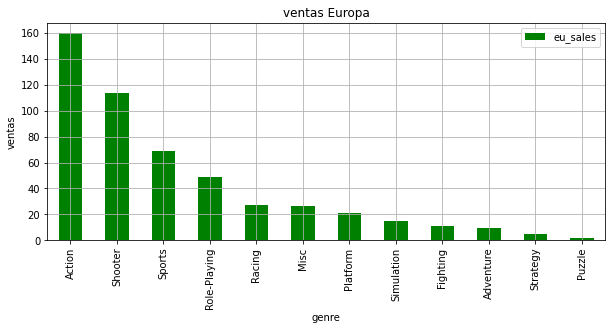

In [108]:
(eu_ventas.pivot_table(index="genre", values="eu_sales", aggfunc="sum")).sort_values(by="eu_sales", ascending=False).plot(kind="bar", color="green", figsize=(10,4), grid=True, title="ventas Europa", ylabel="ventas" )

In [109]:
eu_ventas["rating"].value_counts(normalize=True)

M       0.254125
RP      0.229923
E       0.185369
T       0.175468
E10+    0.155116
Name: rating, dtype: float64

Las gráficas obtenidas para la región Europea muestran lo siguiente:
- Las 5 plataformas que acumularon mayor ventas son: PS4, PS3, X360, Xone y 3DS.
- Los 5 géneros más vendidos fueron: "Action", "Shooter", "Sport", "Role-Playing" y "Racing".
- La distribución en las ventas, muestra una asimetría positiva con sesgo a la derecha (la media(0.28) mayor a la mediana(0.1)) con un fuerte pico que se concentra en valores de 0.01 MMUSD.
- De acuerdo a la información estadística, hay valores extremos.
- En la variable "critic_score", la mediana está en 75 y la media un poco por debajo.
- El mayor rating lo ocupan los adolescentes mayores a 17(M), seguido muy de cerca por pendientes por definir y seguido por todo público(E). 

<div id="jp"/>

### Perfil  región Japón 

<AxesSubplot:title={'center':'ventas Japón'}, xlabel='platform', ylabel='ventas'>

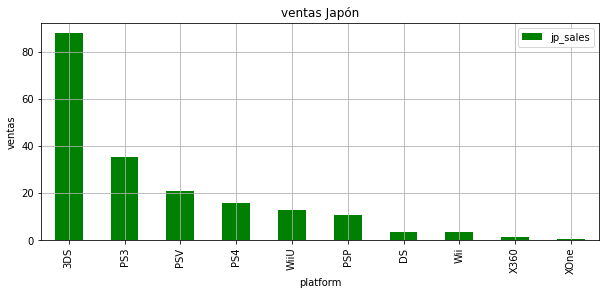

In [110]:
#Perfil Japón
jp_ventas=data_game_ultimo_periodo[data_game_ultimo_periodo["jp_sales"]>0]
jp_ventas_plat=jp_ventas.pivot_table(index="platform", values="jp_sales", aggfunc="sum")
jp_ventas_plat.sort_values(by="jp_sales", ascending=False).plot(kind="bar", color="green", figsize=(10,4), grid=True, title="ventas Japón", ylabel="ventas" )

In [111]:
funcion_estadistica(jp_ventas,"jp_sales", "critic_score", "user_score")

,ventas,critic_score,user_score
count,1572.000000,558.00000,628
mean,0.122723,74.31362,NaN
std,0.316733,10.83184,NaN
min,0.010000,33.00000,NaN
25%,0.020000,68.00000,NaN
50%,0.050000,76.00000,NaN
75%,0.110000,82.00000,NaN
max,4.390000,97.00000,NaN
unique,NaN,NaN,65
top,NaN,NaN,7.8


<AxesSubplot:>

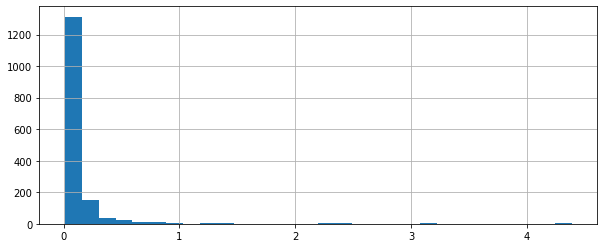

In [112]:
jp_ventas["jp_sales"].hist(bins=30, figsize=(10,4))

<AxesSubplot:title={'center':'ventas Japón'}, xlabel='genre', ylabel='ventas'>

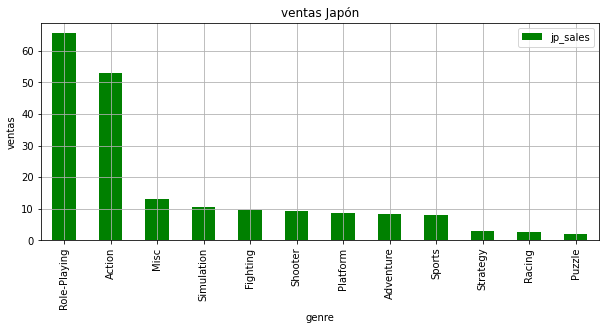

In [113]:
(jp_ventas.pivot_table(index="genre", values="jp_sales", aggfunc="sum")).sort_values(by="jp_sales", ascending=False).plot(kind="bar", color="green", figsize=(10,4), grid=True, title="ventas Japón", ylabel="ventas" )

In [114]:
jp_ventas["rating"].value_counts(normalize=True)

RP      0.600509
T       0.145674
M       0.144402
E       0.066794
E10+    0.042621
Name: rating, dtype: float64

Las gráficas obtenidas para la región de Japón muestran lo siguiente:
- Las 5 plataformas que acumularon mayor ventas son: 3DS, PS3, PSV, PS4, WiiU.
- Los 5 géneros más vendidos fueron: "Role-Playing", "Action", "Misc", "Simulation" y "Fighting".
- La distribución en las ventas, muestra una asimetría positiva con sesgo a la derecha (la media(0.12) mayor a la mediana(0.05)) con un fuerte pico que se concentra en valores de 0.01 MMUSD.
- De acuerdo a la información estadística, hay valores extremos.
- En la variable "critic_score", la mediana está en 76 y la media un poco por debajo.
- Hay un porcentaje elevado (60%) en el rating que está pendiente por definir. Seguido encontramos a los adolescentes y adolescentes mayores a 17 años.

<div id="otras"/>

### Perfil Otras Regiones  

<AxesSubplot:title={'center':'ventas otras Regiones'}, xlabel='platform', ylabel='ventas'>

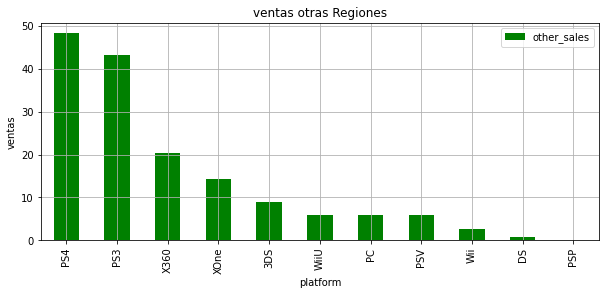

In [115]:
#Perfil otras regiones
otras_ventas=data_game_ultimo_periodo[data_game_ultimo_periodo["other_sales"]>0]
otras_ventas_plat=otras_ventas.pivot_table(index="platform", values="other_sales", aggfunc="sum")
otras_ventas_plat.sort_values(by="other_sales", ascending=False).plot(kind="bar", color="green", figsize=(10,4), grid=True, title="ventas otras Regiones", ylabel="ventas" )

In [116]:
funcion_estadistica(otras_ventas,"other_sales", "critic_score", "user_score")

,ventas,critic_score,user_score
count,1632.000000,1085.000000,1315
mean,0.095784,73.409217,NaN
std,0.209640,12.327268,NaN
min,0.010000,13.000000,NaN
25%,0.010000,68.000000,NaN
50%,0.030000,75.000000,NaN
75%,0.090000,82.000000,NaN
max,3.960000,97.000000,NaN
unique,NaN,NaN,83
top,NaN,NaN,tbd


<AxesSubplot:>

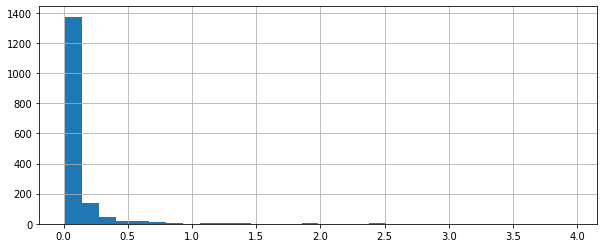

In [117]:
otras_ventas["other_sales"].hist(bins=30, figsize=(10,4))

<AxesSubplot:title={'center':'ventas otras regiones'}, xlabel='genre', ylabel='ventas'>

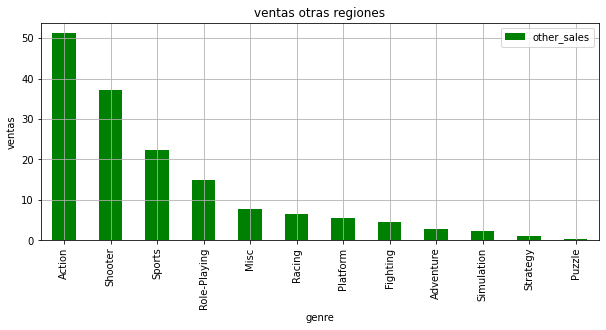

In [118]:
(otras_ventas.pivot_table(index="genre", values="other_sales", aggfunc="sum")).sort_values(by="other_sales", ascending=False).plot(kind="bar", color="green", figsize=(10,4), grid=True, title="ventas otras regiones", ylabel="ventas" )

In [119]:
otras_ventas["rating"].value_counts(normalize=True)

M       0.268382
RP      0.208333
E       0.186275
T       0.181373
E10+    0.155637
Name: rating, dtype: float64

Las gráficas obtenidas para otras regiones muestran lo siguiente:
- Las 5 plataformas que acumularon mayor ventas son: PS4, PS3, X360, Xone, 3DS y WiiU.
- Los 5 géneros más vendidos fueron: "Action", "Shooter", "Sports", "Role-Playing" y "Misc".
- La distribución en las ventas, muestra una asimetría positiva con sesgo a la derecha (la media(0.1) mayor a la mediana(0.03)) con un fuerte pico que se concentra en valores de 0.01 MMUSD.
- De acuerdo a la información estadística, hay valores extremos.
- En la variable "critic_score", la mediana está en 73 y la media un poco por debajo.
- El rating es acaparado por los adolescentes mayores a 17 años.

<div id="todas-regiones"/>

### Comparativo entre regiones 

In [120]:
#Union de las tablas de ventas por region
ventas_por_region = pd.concat([na_ventas_plat, eu_ventas_plat, jp_ventas_plat, otras_ventas_plat], axis=1)
ventas_por_region.reset_index()

,platform,na_sales,eu_sales,jp_sales,other_sales
0,3DS,55.69,42.66,87.82,8.91
1,DS,4.59,3.53,3.72,0.71
2,PC,19.21,38.29,NaN,5.84
3,PS3,103.44,106.86,35.29,43.27
4,PS4,108.74,141.09,15.96,48.35
5,PSP,0.13,0.42,10.71,0.17
6,PSV,11.09,11.41,21.11,5.83
7,Wii,17.45,11.92,3.39,2.61
8,WiiU,38.10,25.13,13.01,5.95
9,X360,140.12,74.52,1.57,20.41


In [121]:
def func_totales_porcentaje(df, df1, df2, df3, column, column1, column2, column3):
    x=df.pivot_table(index="platform", values=column, aggfunc="sum").reset_index()
    y= sum(x[column])
    x["composicion_%"] = ((x[column]) / y)*100
    
    x1=df1.pivot_table(index="platform", values=column1, aggfunc="sum").reset_index()
    y1= sum(x1[column1])
    x1["composicion_%"] = ((x1[column1]) / y1)*100
    
    x2=df2.pivot_table(index="platform", values=column2, aggfunc="sum").reset_index()
    y2= sum(x2[column2])
    x2["composicion_%"] = ((x2[column2]) / y2)*100
    
    x3=df3.pivot_table(index="platform", values=column3, aggfunc="sum").reset_index()
    y3= sum(x3[column3])
    x3["composicion_%"] = ((x3[column3]) / y3)*100
    
    z=y+y1+y2+y3
    
    print("% de ventas en Norteamérica=", round((y / z)*100))
    print("% de ventas en Europa=", round((y1 / z)*100))
    print("% de ventas en Japón=", round((y2 / z)*100))
    print("% de ventas en Otras Regiones=", round((y3 / z)*100))
    
    return

In [122]:
func_totales_porcentaje(na_ventas, eu_ventas, jp_ventas, otras_ventas, "na_sales", "eu_sales", "jp_sales", "other_sales")

% de ventas en Norteamérica= 41
% de ventas en Europa= 35
% de ventas en Japón= 13
% de ventas en Otras Regiones= 11


<AxesSubplot:title={'center':'ventas por region'}, xlabel='platform', ylabel='ventas'>

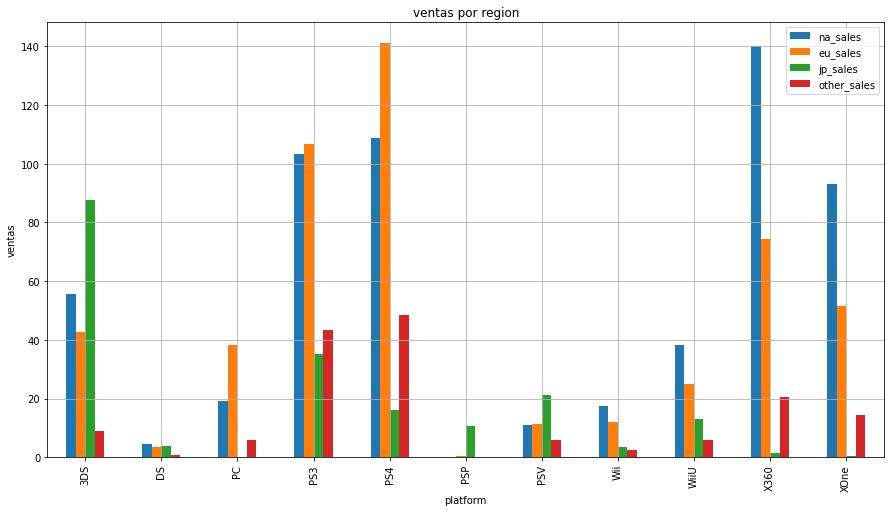

In [123]:
ventas_por_region.plot(kind="bar", figsize=(15,8), grid=True, title="ventas por region", ylabel="ventas")

<AxesSubplot:>

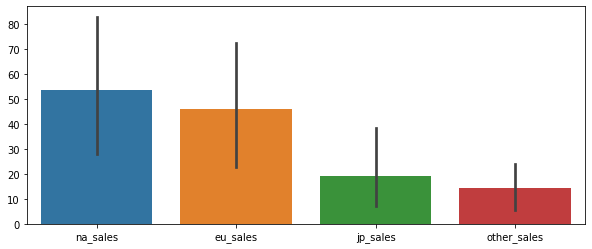

In [124]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=ventas_por_region, ax=ax)

De las gráficas se concluye:
- El mercado de norteamérica comercializa prácticamente todas las plataformas de videojuegos existentes, solo la de PSP es la que no vende porque fue acaparada por el mercado japonés.
- El mayor volumen de ventas se registraron en norteamérica (41%), seguido del mercado europeo (35%), luego japón (13%) y finalmente otras regiones (11%).
- Para las plataformas X360 y Xone, el mercado norteamericano dobla en ventas a los otros mercados.
- Las plataformas que más venden por mercado son: PS4, X360, PS3, Xone, 3DS, WiiU, PC, PSV, Wii, PSP y DS.
- El mercado japonés es líder en ventas para las plataformas 3DS, PSV y PSP.
- El mercado europeo es líder en ventas en las plataformas PS4, PS3 y PC.
- La plataforma PSP solo se comercializa en Japón (mínima presencia en europa), no hay presencia de ellas en norteamérica, europa u otra región.
- Japón practicamente no comercializa la marca de Microsoft Xbox (X360, y Xone) y PC. Por su parte el mercado norteamericano es líder en esta marca, acaparando el mercado. El restante se distribuye entre el mercado europeo y otras regiones.
- En otras regiones casi no se comercializaron las plataformas DS y Wii.

<AxesSubplot:title={'center':'ventas por region'}, ylabel='ventas'>

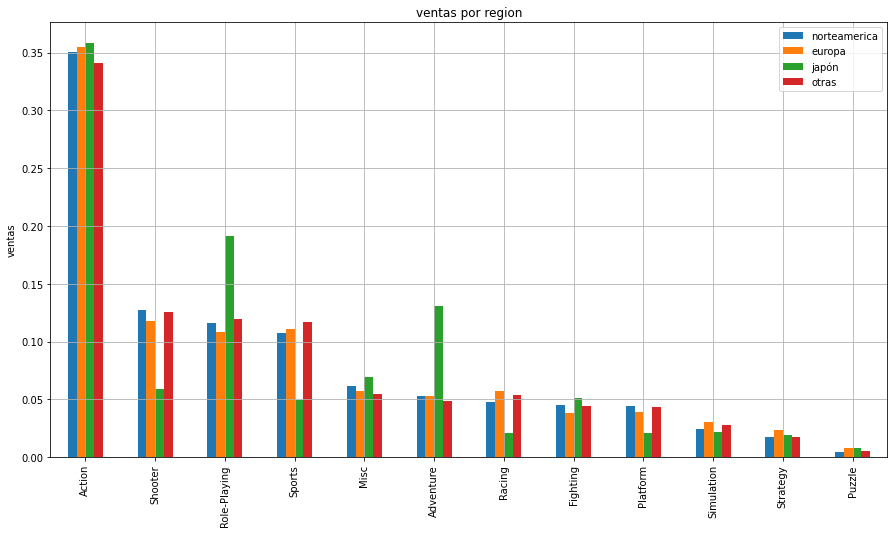

In [125]:
def funcion_variables_por_region(df, df1, df2, df3, columna):
    p1 = df[columna].value_counts(normalize=True) 
    p2 = df1[columna].value_counts(normalize=True)
    p3 = df2[columna].value_counts(normalize=True)
    p4 = df3[columna].value_counts(normalize=True)
    d = pd.concat([p1, p2, p3, p4], axis=1)
    d.columns = ["norteamerica", "europa", "japón", "otras"]
    return d.plot(kind="bar", figsize=(15,8), grid=True, title="ventas por region", ylabel="ventas")
funcion_variables_por_region(na_ventas, eu_ventas, jp_ventas, otras_ventas, "genre")

<AxesSubplot:title={'center':'ventas por region'}, ylabel='ventas'>

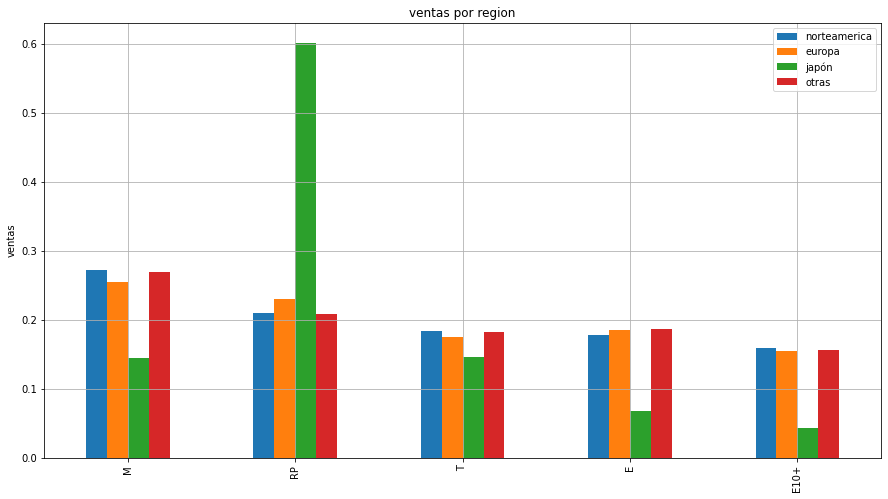

In [126]:
funcion_variables_por_region(na_ventas, eu_ventas, jp_ventas, otras_ventas, "rating")

En cuanto a la distribución de las ventas por género y rating se encontró:
- El mercado japonés es líder en los videojuegos de género "Action", "Role_Playing", "Adventure" y "Misc".
- El mercado norteamericano es líder en las plataformas de género "Shooter" y "Platform".
- El mercado europeo es líder en las plataformas de "Racing", "Simulating" y "Strategy", aunque en estas dos últimas, la diferencia es mínima con los mercados norteamericanos y otras regiones.
- Otras regiones se destaca por los videojuegos de género "Sports".
- En lo referente al rating, el mercado japonés vende más videojuegos con la categoría "RP", la cual surgió en la imputación de los datos ausentes de este renglón, lo que quiere decir, que la mayor cantidad de ausentes proviene de la información de ventas asociadas al mercado japonés. Tiene además pocas ventas en videojuegos con contenido todo público y todo público mayor a 10 años.
- En el resto de las regiones se venden casi por igual los videojuegos con contenido para adolescentes mayores a 17 años(M), adolescentes menores a 17 años(T), todo público y todo público mayor a 10 años.

In [127]:
ventas_por_region.describe()

,na_sales,eu_sales,jp_sales,other_sales
count,11.000000,11.000000,10.000000,11.000000
mean,53.789091,46.129091,19.292000,14.210909
std,49.369856,45.095245,26.348419,16.730204
min,0.130000,0.420000,0.340000,0.170000
25%,14.270000,11.665000,3.472500,4.220000
50%,38.100000,38.290000,11.860000,5.950000
75%,98.280000,63.055000,19.822500,17.340000
max,140.120000,141.090000,87.820000,48.350000


<AxesSubplot:>

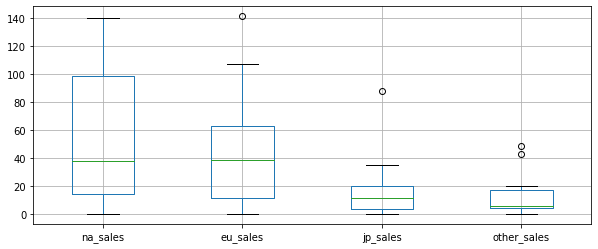

In [128]:
ventas_por_region.boxplot(figsize=(10,4))

Con el gráfico de caja se aprecia:
- las mayores ventas se generan en el mercado norteamericano, seguido del europeo, el japonés y finalmente otros mercados. 
- Las ventas provenientes de todos los mercados muestran una asimetría positiva (media mayor que la mediana) con alta concentración de datos entre la mediana y tercer cuartil.
- Todos los mercados, a excepción del norteamericano, presentan valores atípicos en las ventas.

<div id="Prueba-hipótesis"/>

## Prueba de Hipótesis 

<div id="hip1"/>

### Calificaciones promedio para las plataformas Xone y PC 

Para ello se planteo como:

1. Hipótesis Nula: La media de las calificaciones de los usuarios para la plataforma Xone es igual a la media de las calificaciones de los usuarios de la plataforma PC.
2. Hipótesis alternativa: La media de las calificaciones de los usuarios para la plataforma Xone difiere de la media de las calificaciones de los usuarios de la plataforma PC.



In [129]:
#cálculo de usuarios que usan Xone
usuario_xone = data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016) and platform=="XOne"')
usuario_xone_user = usuario_xone["user_score"].dropna()
usuario_xone_user.var()

1.9069968429360695

In [130]:
#cálculo de usuarios que usan PC
usuario_pc = data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016) and platform=="PC"')
usuario_pc_user = usuario_pc["user_score"].dropna()
usuario_pc_user.var()

2.7616978896539393

In [131]:
#Prueba de Levene
alpha=0.05
#hipótesis nula: Las varianzas poblacionales son iguales
stat, p = levene(usuario_xone_user,usuario_pc_user)
print(p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

0.012016134374904607
Rechazamos la hipótesis nula


El valor de p (menor al nivel de significación de 0.05), sugiere que la diferencia en las varianzas es estadísticamente significativa. 

In [132]:
#calculo de datos estadísticos para usuarios con diferentes plataformas
def funcion_estadistica_describe(df, df1):
    p1 = df.describe() 
    p2 = df1.describe()
    d = pd.concat([p1, p2], axis=1)
    d.columns = ["Resumen estadístico user 1", "Resumen estadístico user 2"]
    return d

funcion_estadistica_describe(usuario_xone_user, usuario_pc_user)

,Resumen estadístico user 1,Resumen estadístico user 2
count,182.000000,212.000000
mean,6.521429,6.431604
std,1.380941,1.661836
min,1.600000,1.400000
25%,5.800000,5.500000
50%,6.800000,6.800000
75%,7.500000,7.700000
max,9.200000,9.300000


In [133]:
#cálculo de la probabilidad para comprobar hipótesis nula
sample1=usuario_xone_user
sample2=usuario_pc_user
alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.5582859272842214
No rechazamos la hipótesis nula


Con este resultado se afirma que no hay suficiente evidencia para rechazar la hipótesis nula que establecía que ambas medias de calificación de usuario para los juegos Xone y PC son iguales. 

<div id="hip2"/>

### Calificaciones promedio para los géneros Action y Sports 

1. Hipótesis Nula: La media de las calificaciones de los usuarios para los videojuegos de género "Action" es igual a la media de las calificaciones de los usuarios para los videojuegos de género "Sports".
2. Hipótesis alternativa: La media de las calificaciones de los usuarios para los videojuegos de género "Action" difiere de la media de las calificaciones de los usuarios para los videojuegos de género "Sports".

In [134]:
#Seccionamiento de usuarios que usan género Action
usuario_action = data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016) and genre=="Action"')
usuario_action_user = usuario_action["user_score"].dropna()
usuario_action_user.var()

1.8862261814231394

In [135]:
#Seccionamiento de usuarios que usan género Sports
usuario_sport = data_game.query('year_of_release==(2012, 2013, 2014, 2015, 2016) and genre=="Sports"')
usuario_sport_user = usuario_sport["user_score"].dropna()
usuario_sport_user.var()

3.022890298704732

In [136]:
#Prueba de Levene
alpha=0.05
#hipótesis nula: Las varianzas poblacionales son iguales
stat, p = levene(usuario_action_user,usuario_sport_user)
print(p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

1.3109853828468498e-05
Rechazamos la hipótesis nula


El valor de p (menor al nivel de significación de 0.05), sugiere que tanto las varianzas puntuales como de la población son estadísticamente diferentes.

In [137]:
funcion_estadistica_describe(usuario_action_user, usuario_sport_user)

,Resumen estadístico user 1,Resumen estadístico user 2
count,526.000000,195.000000
mean,6.825095,5.455897
std,1.373399,1.738646
min,1.600000,0.200000
25%,6.200000,4.300000
50%,7.100000,5.700000
75%,7.800000,6.800000
max,9.100000,8.800000


In [138]:
#cálculo de la probabilidad para comprobar hipótesis nula
sample1=usuario_action_user
sample2=usuario_sport_user
alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  4.078419489491382e-20
Rechazamos la hipótesis nula


Con este resultado, hay evidencia suficiente para rechazar la hipótesis nula que establece que ambas medias de calificación de usuario para los juegos con género "Action" y "Sports" son iguales.

<div id="Conclusiones"/>

## Conclusiones 

Finalmente después de realizar el análisis de los datos, se concluye:

Dataframe:
- Inicialmente se tenía un Dataframe con 16715 datos y 11 columnas. 
- Las columnas "name" y "genre" tienen 2 valores ausentes que coinciden entre si para la plataforma GEN y aunque no hay datos para las calificaciones, si tienen datos para las ventas, por lo que se mantienen en el Dataframe.
- La columna "years_of_release" tenía inicialmente 2% de datos ausentes, se hizo la imputación por nombre y género, posteriormente por plataforma.
- La cantidad de datos ausentes en la columna "rating" correspondía a 40% y se imputaron por RP. Gran parte de estos datos corresponden a la región de Japón.
- Los ausentes en la columna "critic_score" representan el 51% y en la columna "user_score" representan el 40% de la data. El 98% de los ausentes de "critic_score" están presentes como ausentes, para esos mismos registros en la columna "user_score".
- El 22% de los datos ausentes en "critic_score" corresponden a videojuegos de la década de los 80 y 90, muy probablemente no estaba bien definido el sistema de calificación.
- En la columna "user_score" se encontró una calificación de "tbd" (2424 registros), la cual al cruzarse con los datos ausentes en "critic_score", se encontró que eran 1342 (55%) del total de registros con este valor en el campo.
- No se encontraron registros duplicados en el Dataframe.
- Se eliminaron 2 registros que no contenían datos de ventas ni de calificación, quedando un Dataframe con 16713 datos y 13 columnas.


Plataformas con más juegos lanzados:
- La década de los 80 y mediado de los 90 fueron desérticas para los videojuegos, solo alcanzaron a destacar un poco SNES, Atari 2600, N64, PS y SAT.
- A partir del año 2000 se produjo un gran auge en los lanzamientos de videojuegos, siendo el período 2005 - 2009 el de mayor boom, seguido del período 2010 - 2016.
- El 68% de los videojuegos, fueron lanzados entre el 2005-2016.
- En el período 2000-2004 PS2 fue la plataforma que más lanzó videojuegos seguido de GBA, XB y GC.
- En el período de más auge (2005-2009), la plataforma DS fue la que mayor cantidad de juegos lanzó, seguido de PS2, Wii, PSP, X360 y PS3. En este mismo período las de menores ventas fueron DC, GC, GBA, XB y PC.
- Específicamente los años 2008 y 2009, fueron los mejores años dorados para lanzamientos de videojuegos. PS2 y DS fueron las plataformas con más ventas, aventajando a sus competidores PS3, Wii, X360, PSP y PS, por más de 500 juegos.
- En el período 2012-2016 la plataforma con mayor lanzamiento de videojuegos fue PS3 seguido de PS4, X360, Xone, 3DS, PC, WiiU, Wii, PSV, PSP y PC.
- Las plataformas que más juegos lanzaron fueron PS2 y DS, seguidas por PS3, Wii, X360, PSP, PS, PC, XB, GBA, GC, 3DS y PSV.
- Las plataformas que praticamente no lanzaron videojuegos al mercado y por supuesto no reportaron casi ventas fueron GC, PCFX, 3DO, WS, SCD, NG y GEN.

Ventas:
- Las mayores ventas reportadas por videojuegos corresponden a PS2, que también resultó ser la plataforma que reportó mayores lanzamientos de juegos, posicionándose la PS2 como la más vendida.
- Las plataformas PS2, X360, PS3, Wii y DS son las cinco que más vendieron videojuegos.
- Hay un gran número de plataformas con márgenes de ventas muy bajos.
- Las ventas totales por año, muestran que el 2008 seguido muy de cerca por 2009, 2007 y 2010 fueron los años de mayores ventas para los videojuegos. 
- Su distribución muestra asimetría positiva (media mayor a la mediana) con un fuerte pico en valores por debajo de 50 MM de dólares de las ventas por año, posteriormente se observan picos a 200, 360 y 520 MM de dólares. Hay valores extremos marcados.
- En el período 2012 - 2016 las mayores ventas promedios fueron alcanzadas por: PS4, PS3, X360, Xone y 3DS.

Tiempo de vida de los videojuegos en el mercado:
- Las cónsolas de PS2, PS3, X360 y DS son las que más tiempo permanecen con ventas altas, es decir, se consolidan por más tiempo en el mercado, recolectando por concepto de ventas, mayores ingresos.
- Las plataformas de PS y Wii son las que más rápido pierden popularidad, dando un pico rápido en ventas pero que cae rápidamente.
- Las 5 plataformas más duraderas en el mercado de los videojuegos, en orden descendente son: PC, DS, 2600, PSP y 3DS, sin embargo, no son las que más lanzamientos han realizado, solo coincide la DS.
- Se estimó que el tiempo promedio de vida de las plataformas es de 7 años, y el 50% de los datos ya alcanza este promedio.


Análisis del impacto de la calificación:
- La columna de ventas totales tiene una correlación positiva, aunque débil (0.43), con la columna "critic_score", esto significa que a medida que aumenta la calificación (se aproxima a 100), aumentan las ventas de los videojuegos.
- La columna de ventas totales tiene una correlación positiva pero débil, con la columna de calificación de usuario. 
- Las columnas de "critic_score" y "user_score" se relacionan entre si de manera positiva, es decir, una alta calificación profesional resultará muy probablemente en una alta calificación de usuario.
- La gráfica de dispersión, muestra que la mayor concentración de datos se da a valores altos de calificación tanto de profesionales (mayor a 70) como de usuario(mayor de 6) y la mayor dispersión se alcanza en valores bajos de calificación.
- Las mejores críticas profesionales las tiene la plataforma de DC que paradojicamente no es la plataforma de mayores ventas, al contrario es la de menor ventas, uhmmm, esto nos indica que los usuarios prefieren otras características de los videojuegos (como el género) a considerar.
- Todas las plataformas tienen calificaciones por encima de 60 y las de mayores ventas oscilan alrededor de 70.

Análisis del género más vendido:
- De acuerdo al género que más vende, en el período 2012 - 2016 en las 11 mejores plataformas de ventas, se concluye que son los videojuegos de "Action" los más vendidos, seguido del género de "Shooter" y en tercer lugar el de "Role-Playing". Los juegos de "Strategy", "Puzzle", y "Adventure" son los que menos se venden.

Videojuegos lanzados en varias plataformas:
- El juego FIFA 15 se comercializó en 8 de las 11 plataformas que más vendieron videojuegos en los últimos años, recaudando un total de 17.37 MM de dólares. La versión de este juego en las cónsolas de PS4 y PS3 fueron las más vendidas.
- El juego FIFA 14 se comercializó en 9 de las 11 plataformas que más vendieron videojuegos en los últimos años, fue uno de los más populares junto a LEGO Marvel Super Heroes, sin embargo no alcanzó superar a la versión más nueva de FIFA 15. - Los ingresos de FIFA 14 y LEGO Marvel Super Heroes fueron de 16.46 y 9.41 MM de dólares respectivamente. Como era de esperarse FIFA 14 se vendió más en PS3 (muy probablemente la PS4 estaba entrando en el mercado y cuando salió ya trajo la nueva versión FIFA 15) y X360. Por su parte LEGO se vendió más en X360 seguido PS3.
- El videojuego FIFA Soccer 13 se lanzó en 8 de las 11 plataformas con mayores ventas, recaudando un total de 15.97 MMUSD, siendo las plataformas PS3 y X360 las que más ingresos por ventas percibieron. No se comercializó en PS4 de - seguro porque aún no salia al mercado esta plataforma.
- El videojuego LEGO Movie Videogame alcanzó a recaudar 5.09 MM de dólares estando disponible en 8 plataformas.
- En fin los juegos de FIFA resultaron ser los ganadores en el período 2012-2016 y la familia PS la que más lo comercializó.

Perfil Región Norteamerica (período 2012-2016)
- Las 5 plataformas que acumularon mayor ventas son: X360, PS4, PS3, Xone, 3DS.
- Los 5 géneros más vendidos fueron: "Action", "Shooter", "Role-Playing", "Sports" y "Misc".
- La distribución en las ventas, muestra una asimetría positiva con sesgo a la derecha (la media(0.35) mayor a la mediana(0.13)) con un fuerte pico que se concentra en valores de 0.01 MMUSD.
- De acuerdo a la información estadística, hay valores extremos.

Perfil Región Europea (período 2012-2016)
- Las 5 plataformas que acumularon mayor ventas son: PS2, PS3, X360, Xone, 3DS.
- Los 5 géneros más vendidos fueron: "Action", "Shooter", "Role-Playing", "Sports" y "Misc".
- La distribución en las ventas, muestra una asimetría positiva con sesgo a la derecha (la media(0.28) mayor a la mediana(0.1)) con un fuerte pico que se concentra en valores de 0.01 MMUSD.
- De acuerdo a la información estadística, hay valores extremos.

Perfil Región Japón (período 2012-2016)
- Las 5 plataformas que acumularon mayor ventas son: 3DS, PS3, PSV, PS4, WiiU.
- Los 5 géneros más vendidos fueron: !Action", "Role-Playing", "Adventure", "Misc" y "Shooter".
- La distribución en las ventas, muestra una asimetría positiva con sesgo a la derecha (la media(0.12) mayor a la mediana(0.05)) con un fuerte pico que se concentra en valores de 0.01 MMUSD.
- De acuerdo a la información estadística, hay valores extremos.
- En rating presenta alto porcentaje en RP.

Perfil Otras Regiones
- Las 5 plataformas que acumularon mayor ventas son: PS4, PS3, X360, Xone y 3DS.
- Los 5 géneros más vendidos fueron: "Action", "Shooter", "Role-Playing", "Sports" y "Misc".
- La distribución en las ventas, muestra una asimetría positiva con sesgo a la derecha (la media(0.1) mayor a la mediana(0.03)) con un fuerte pico que se concentra en valores de 0.01 MMUSD.
- De acuerdo a la información estadística, hay valores extremos.

Comparativo entre regiones
- El mercado de norteamérica comercializa prácticamente todas las plataformas de videojuegos existentes, solo la de PSP es la que no vende porque fue acaparada por el mercado japonés.
- El mayor volumen de ventas se registraron en norteamérica (41%), seguido del mercado europeo (35%), luego japón (13%) y finalmente otras regiones (11%).
- Para las plataformas X360 y Xone, el mercado norteamericano dobla en ventas a los otros mercados.
- Las plataformas que más venden por mercado son: PS4, X360, PS3, Xone, 3DS, WiiU, PC, PSV, Wii, PSP y DS.
- El mercado japonés es líder en ventas para las plataformas 3DS, PSV y PSP.
- El mercado europeo es líder en ventas en las plataformas PS4, PS3 y PC.
- La plataforma PSP solo se comercializa en Japón (mínima presencia en europa), no hay presencia de ellas en norteamérica, europa u otra región.
- Japón practicamente no comercializa la marca de Microsoft Xbox (X360, y Xone) y PC. Por su parte el mercado norteamericano es líder en esta marca, acaparando el mercado. El restante se distribuye entre el mercado europeo y otras regiones.
- En otras regiones casi no se comercializaron las plataformas DS y Wii. 
- El mercado japonés es líder en los videojuegos de género "Action", "Role_Playing", "Adventure" y "Misc".
- El mercado norteamericano es líder en las plataformas de género "Shooter" y "Platform".
- El mercado europeo es líder en las plataformas de "Racing", "Simulating" y "Strategy", aunque en estas dos últimas, la diferencia es mínima con los mercados norteamericanos y otras regiones.
- Otras regiones se destaca por los videojuegos de género "Sports".
- En lo referente al rating, el mercado japonés vende más videojuegos con la categoría "RP", la cual surgió en la imputación de los datos ausentes de este renglón, lo que quiere decir, que la mayor cantidad de ausentes proviene de la información de ventas asociadas al mercado japonés. Tiene además pocas ventas en videojuegos con contenido todo público y todo público mayor a 10 años.
- En el resto de las regiones se venden casi por igual los videojuegos con contenido para adultos, adolescentes, todo público y todo público mayor a 10 años.

Prueba de Hipótesis:
- No hay suficiente evidencia para rechar la Hipótesis Nula: La media de las calificaciones de los usuarios para la plataforma Xone es igual a la media de las calificaciones de los usuarios de la plataforma PC.  
- Hay suficiente evidencia para rechazar la Hipótesis Nula: La media de las calificaciones de los usuarios para los videojuegos de género "Action" es igual a la media de las calificaciones de los usuarios para los videojuegos de género "Sports".
